In [ ]:
# Install yfinance and pandas if needed
!pip install yfinance pandas --quiet

import yfinance as yf
import pandas as pd

# Step 1: Define tickers and date range
tickers = ['AAPL', 'GOOG', 'TSLA', 'AMZN', 'MSFT']
start_date = "2024-01-01"
end_date   = "2025-01-01"

# Step 2: Download historical data
# Keep auto_adjust=False to retain raw OHLC + Adj Close
data = yf.download(tickers, start=start_date, end=end_date, interval='1d', auto_adjust=False)

# Step 3a: Extract Adjusted Close (for single-attribute analysis)
adj_close = data['Adj Close'].copy()
adj_close.columns = [f"{ticker}_Adj_Close" for ticker in adj_close.columns]

# Step 3b: Extract raw OHLC + Volume (for multi-feature analysis)
ohlc = data[['Open','High','Low','Close','Volume']].copy()
ohlc.columns = [f"{col}_{ticker}" for col, ticker in ohlc.columns]

# Step 4: Merge both into one wide DataFrame
merged_df = pd.concat([adj_close, ohlc], axis=1)

# Step 5: Drop rows with missing values to ensure clean dataset
merged_df.dropna(inplace=True)

# Step 6: Save merged dataset for further analysis
merged_df.to_csv("merged_stock_data.csv")

# Step 7: Quick check
print("Merged dataset shape:", merged_df.shape)
print(merged_df.head())


#Linear Operations

#Feature Selection

#Time series Analysis

[*********************100%***********************]  5 of 5 completed


Merged dataset shape: (252, 30)
            AAPL_Adj_Close  AMZN_Adj_Close  GOOG_Adj_Close  MSFT_Adj_Close  \
Date                                                                         
2024-01-02      184.081497      149.929993      138.611450      366.105591   
2024-01-03      182.703171      148.470001      139.406006      365.839020   
2024-01-04      180.382828      144.570007      137.101761      363.213196   
2024-01-05      179.658936      145.240005      136.456192      363.025665   
2024-01-08      184.002182      149.100006      139.574860      369.876495   

            TSLA_Adj_Close   Open_AAPL   Open_AMZN   Open_GOOG   Open_MSFT  \
Date                                                                         
2024-01-02      248.419998  187.149994  151.539993  139.600006  373.859985   
2024-01-03      238.449997  184.220001  149.199997  138.600006  369.010010   
2024-01-04      237.929993  182.149994  145.589996  139.850006  370.670013   
2024-01-05      237.490005  181

[*********************100%***********************]  5 of 5 completed


Merged dataset shape: (252, 30)
            AAPL_Adj_Close  AMZN_Adj_Close  GOOG_Adj_Close  MSFT_Adj_Close  \
Date                                                                         
2024-01-02      184.081482      149.929993      138.611420      366.105530   
2024-01-03      182.703156      148.470001      139.406021      365.839050   
2024-01-04      180.382828      144.570007      137.101776      363.213196   
2024-01-05      179.658936      145.240005      136.456177      363.025635   
2024-01-08      184.002182      149.100006      139.574860      369.876465   

            TSLA_Adj_Close   Open_AAPL   Open_AMZN   Open_GOOG   Open_MSFT  \
Date                                                                         
2024-01-02      248.419998  187.149994  151.539993  139.600006  373.859985   
2024-01-03      238.449997  184.220001  149.199997  138.600006  369.010010   
2024-01-04      237.929993  182.149994  145.589996  139.850006  370.670013   
2024-01-05      237.490005  181

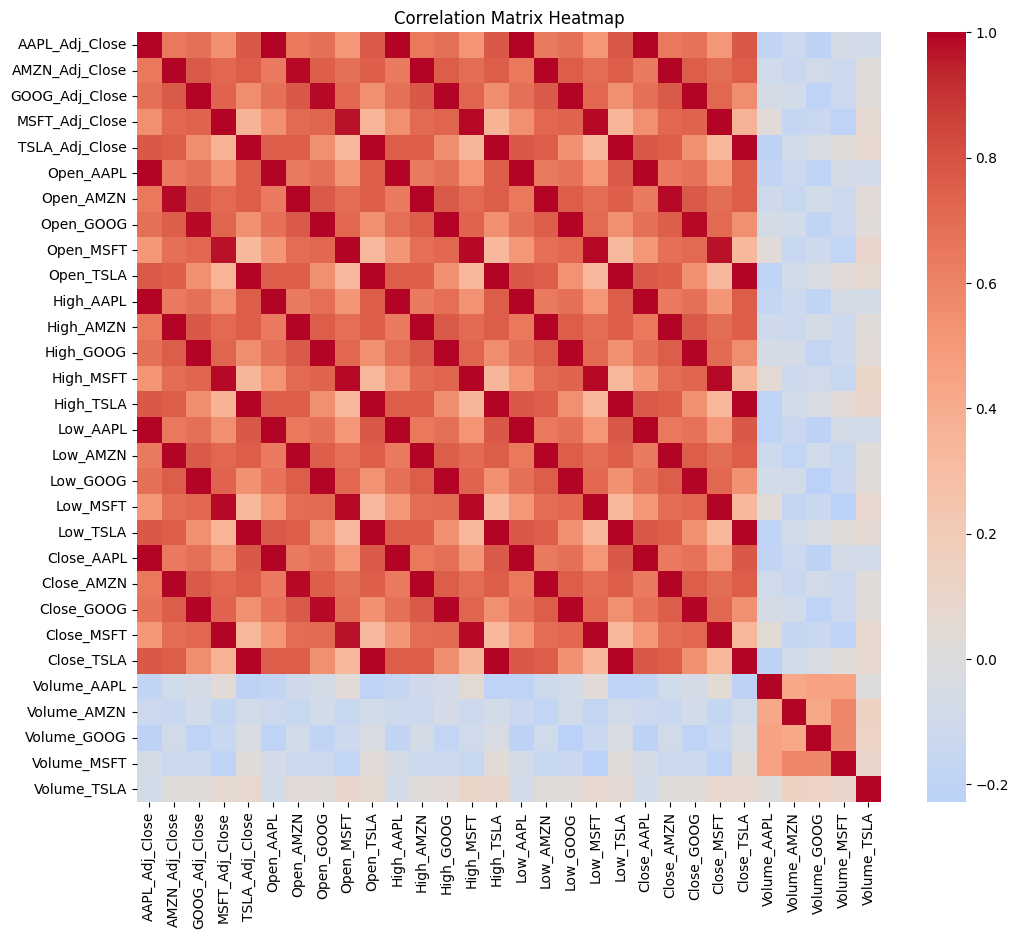

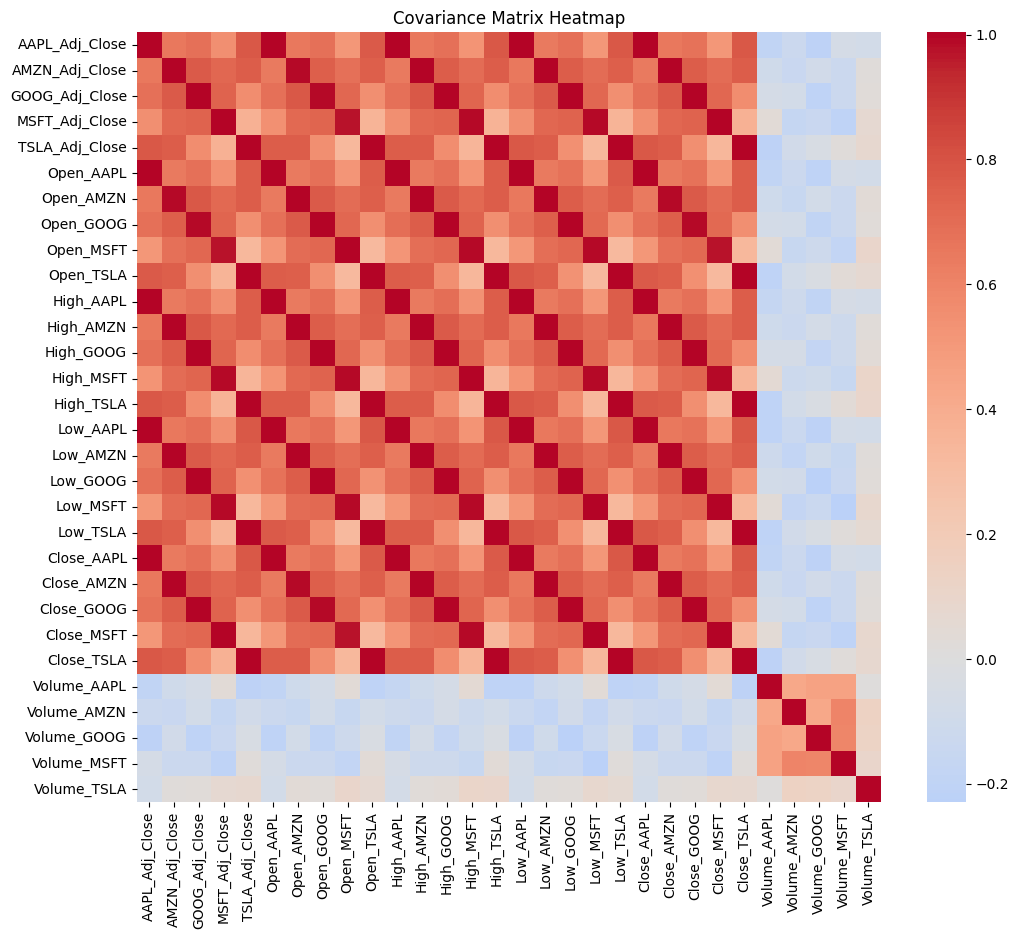

Step 4: Eigenvalues and eigenvectors computed.
Top 5 eigenvalues: [18.11365927  3.89219778  2.4912231   1.70464631  1.16953133]
Step 5: PCA completed.
Explained variance by 2 PCs: [0.60139266 0.12922508]

Step 5b: PCA Loadings (feature contributions):
                     PC1       PC2
AAPL_Adj_Close  0.201741 -0.146354
AMZN_Adj_Close  0.215359  0.012980
GOOG_Adj_Close  0.207979  0.122712
MSFT_Adj_Close  0.185363  0.276269
TSLA_Adj_Close  0.190463 -0.272013
Open_AAPL       0.200918 -0.144261
Open_AMZN       0.215748  0.015450
Open_GOOG       0.206771  0.122290
Open_MSFT       0.178773  0.288135
Open_TSLA       0.189063 -0.276482

Top 10 contributors to PC1:
High_AMZN         0.215816
Open_AMZN         0.215748
Low_AMZN          0.215376
AMZN_Adj_Close    0.215359
Close_AMZN        0.215359
GOOG_Adj_Close    0.207979
High_GOOG         0.207396
Close_GOOG        0.206989
Low_GOOG          0.206877
Open_GOOG         0.206771
Name: PC1, dtype: float64

Top 10 contributors to PC2:
Low_MSFT 

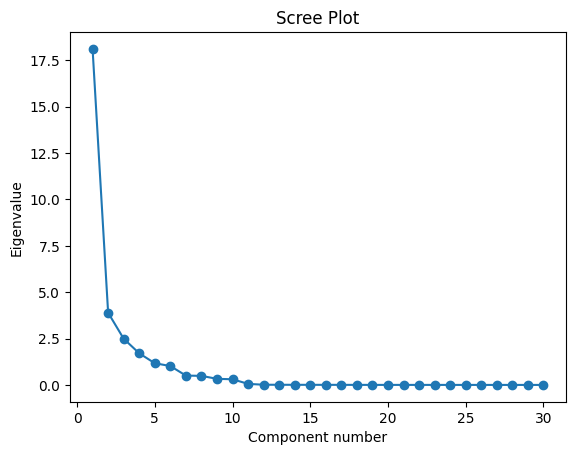

Step 6: SVD completed.
Top 5 singular values: [67.42795026 31.25606568 25.00593928 20.68492748 17.13336992]


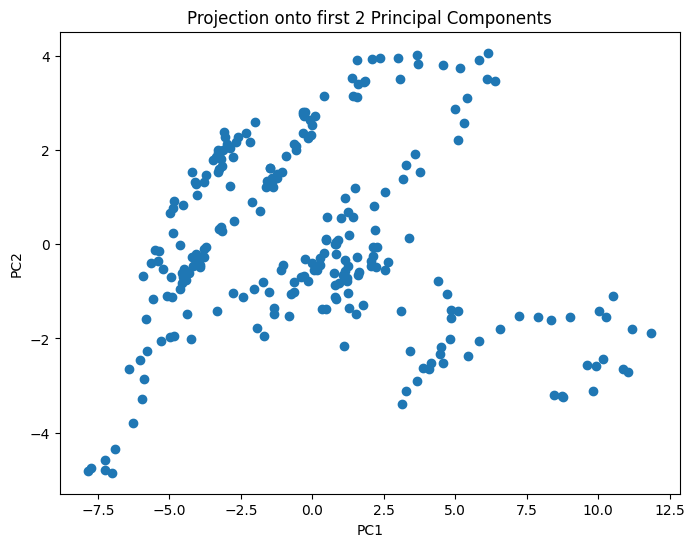

Step 7: Projection onto PCs completed.
Step 8: Least-squares regression completed.
Regression coefficients for PC1 and PC2: [ 5.15922247 -3.7427887 ]
Residual sum of squares: [10727991.9903849]


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import svd, eigh, lstsq
import matplotlib.pyplot as plt
import seaborn as sns

# Install yfinance and pandas if needed
!pip install yfinance pandas --quiet

import yfinance as yf
import pandas as pd

tickers = ['AAPL', 'GOOG', 'TSLA', 'AMZN', 'MSFT']
start_date = "2024-01-01"
end_date   = "2025-01-01"

data = yf.download(tickers, start=start_date, end=end_date, interval='1d', auto_adjust=False)

adj_close = data['Adj Close'].copy()
adj_close.columns = [f"{ticker}_Adj_Close" for ticker in adj_close.columns]

ohlc = data[['Open','High','Low','Close','Volume']].copy()
ohlc.columns = [f"{col}_{ticker}" for col, ticker in ohlc.columns]

merged_df = pd.concat([adj_close, ohlc], axis=1)
merged_df.dropna(inplace=True)

print("Merged dataset shape:", merged_df.shape)  #Merged dataset
print(merged_df.head())

#Matrix representation
X = merged_df.to_numpy()
feature_names = merged_df.columns.tolist()
print("\nStep 1: Matrix representation done. Shape:", X.shape)

#Centering & Scaling: Z-scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Step 2: Centering and scaling done.")

# Covariance & Correlation
cov_matrix = np.cov(X_scaled, rowvar=False)
corr_matrix = np.corrcoef(X_scaled, rowvar=False)
print("Step 3: Covariance and correlation matrices computed.")

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, xticklabels=feature_names, yticklabels=feature_names,
            cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

cov_df = pd.DataFrame(cov_matrix, index=feature_names, columns=feature_names)
plt.figure(figsize=(12,10))
sns.heatmap(cov_df, xticklabels=feature_names, yticklabels=feature_names,
            cmap='coolwarm', center=0)
plt.title("Covariance Matrix Heatmap")
plt.show()

#Eigenvalues & Eigenvectors
eigvals, eigvecs = eigh(cov_matrix)
eigvals = eigvals[::-1]
eigvecs = eigvecs[:, ::-1]
print("Step 4: Eigenvalues and eigenvectors computed.")
print("Top 5 eigenvalues:", eigvals[:5])

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Step 5: PCA completed.")
print("Explained variance by 2 PCs:", pca.explained_variance_ratio_)

loadings = pd.DataFrame(
    pca.components_.T,        # rows = features, cols = PCs
    columns=['PC1', 'PC2'],
    index=feature_names
)
print("\nStep 5b: PCA Loadings (feature contributions):")
print(loadings.head(10))  # show first 10 rows for brevity

pc1_top = loadings['PC1'].abs().sort_values(ascending=False)
pc2_top = loadings['PC2'].abs().sort_values(ascending=False)
print("\nTop 10 contributors to PC1:")
print(pc1_top.head(10))
print("\nTop 10 contributors to PC2:")
print(pc2_top.head(10))

# Scree plot
plt.figure()
plt.plot(np.arange(1, len(eigvals)+1), eigvals, marker='o')
plt.xlabel("Component number")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.show()

#SVD
U, S, Vt = svd(X_scaled, full_matrices=False)
print("Step 6: SVD completed.")
print("Top 5 singular values:", S[:5])


#Projection onto first 2 PCs
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection onto first 2 Principal Components")
plt.show()
print("Step 7: Projection onto PCs completed.")

#Least-Squares Regression
y = merged_df['AAPL_Adj_Close'].to_numpy()
w, residuals, rank, s = lstsq(X_pca, y, rcond=None)
print("Step 8: Least-squares regression completed.")
print("Regression coefficients for PC1 and PC2:", w)
print("Residual sum of squares:", residuals)


/tmp/ipython-input-2967425337.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2024-01-01', end='2025-01-01')[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed


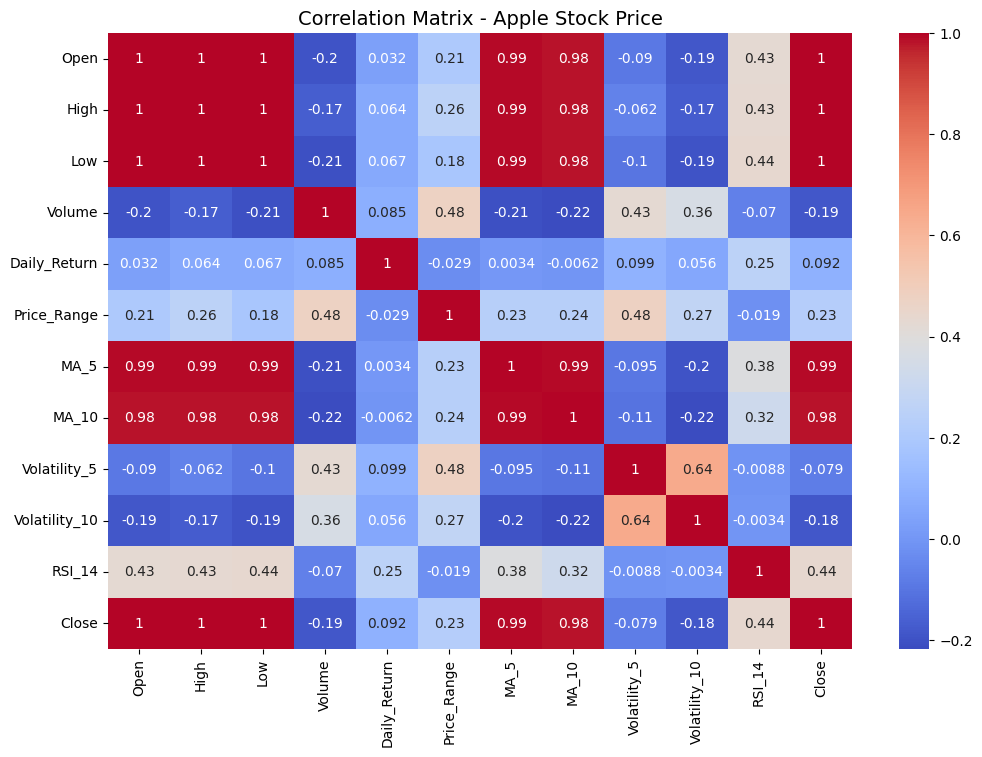


Top Features highly correlated with Close price:
 ['Open', 'High', 'Low', 'MA_5', 'MA_10']

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.7810
Root Mean Squared Error (RMSE): 1.0123
R² Score: 0.9920


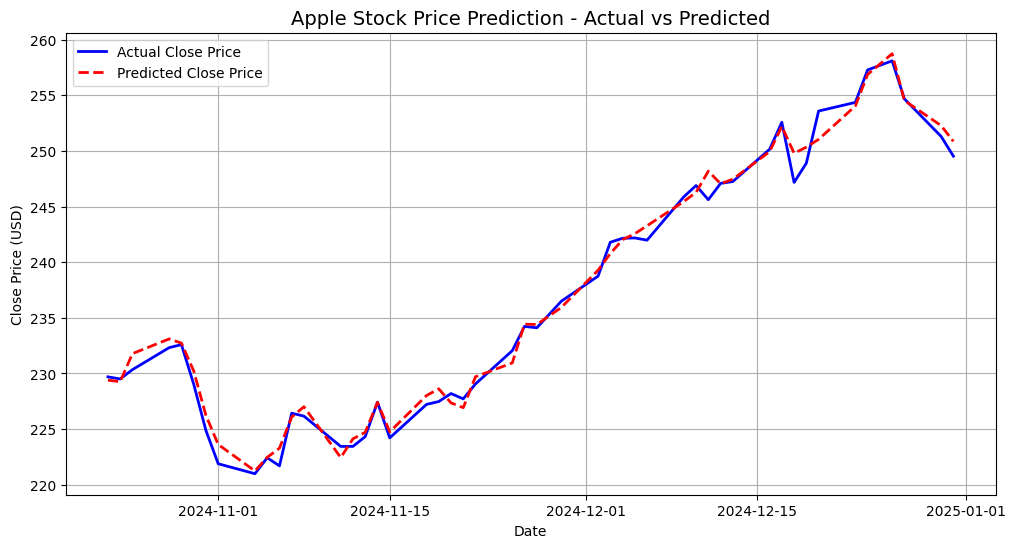

/tmp/ipython-input-2967425337.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2024-01-01', end='2025-01-01')[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2967425337.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')


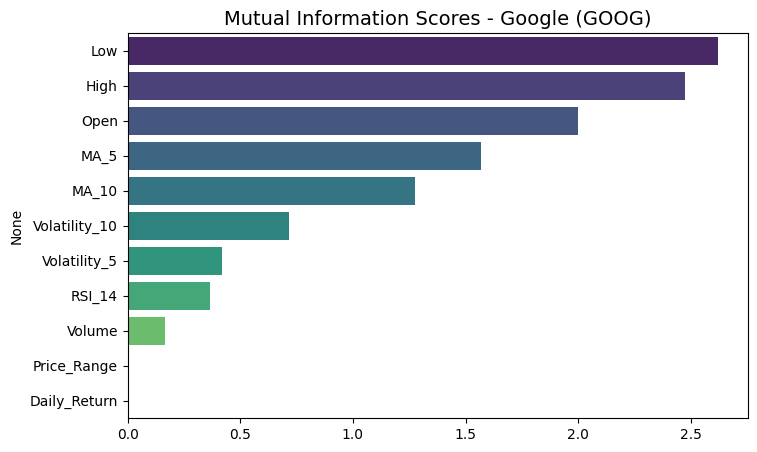


Mutual Information Scores (Google):
 Low              2.621270
High             2.472325
Open             1.997262
MA_5             1.570205
MA_10            1.273991
Volatility_10    0.718386
Volatility_5     0.416852
RSI_14           0.367062
Volume           0.163925
Price_Range      0.000000
Daily_Return     0.000000
dtype: float64


/tmp/ipython-input-2967425337.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2024-01-01', end='2025-01-01')[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2967425337.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='coolwarm')


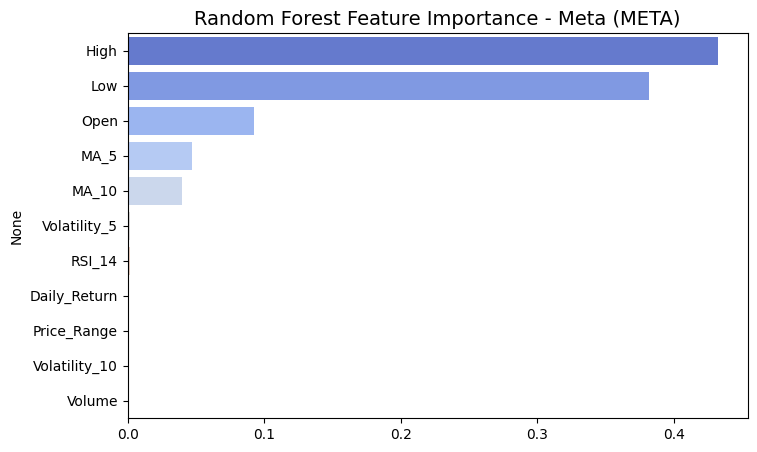

/tmp/ipython-input-2967425337.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2024-01-01', end='2025-01-01')[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed


Random Forest Feature Importances (Meta):
 High             0.432346
Low              0.381789
Open             0.092520
MA_5             0.047297
MA_10            0.039683
Volatility_5     0.001523
RSI_14           0.001420
Daily_Return     0.001056
Price_Range      0.001004
Volatility_10    0.000966
Volume           0.000396
dtype: float64



/tmp/ipython-input-2967425337.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rfe_ranking.values, y=rfe_ranking.index, palette='magma')


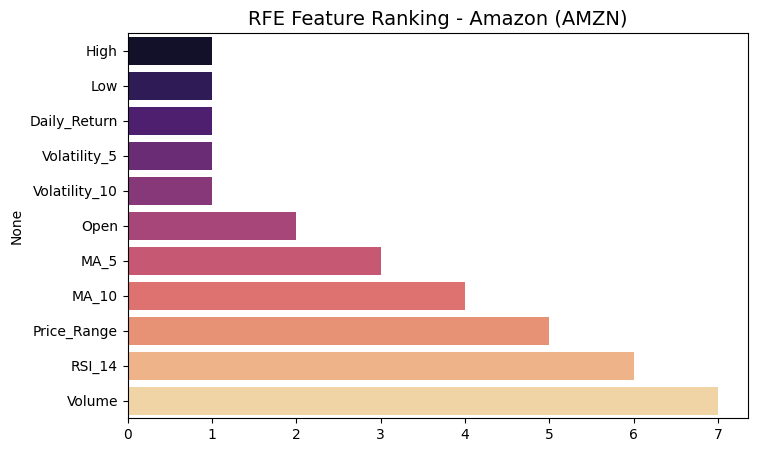


RFE Feature Ranking:
 High             1
Low              1
Daily_Return     1
Volatility_5     1
Volatility_10    1
Open             2
MA_5             3
MA_10            4
Price_Range      5
RSI_14           6
Volume           7
dtype: int64

Selected Features by RFE:
 ['High', 'Low', 'Daily_Return', 'Volatility_5', 'Volatility_10']


In [ ]:
###################### FEATURE SELECTION ########################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Preparing stock data for  selected ticker
def prepare_stock_data(ticker):
    df = yf.download(ticker, start='2024-01-01', end='2025-01-01')[['Open', 'High', 'Low', 'Close', 'Volume']]
    df['Daily_Return'] = df['Close'].pct_change()
    df['Price_Range'] = df['High'] - df['Low']

    # Technical Indicators
    df['MA_5'] = df['Close'].rolling(window=5).mean()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['Volatility_5'] = df['Daily_Return'].rolling(window=5).std()
    df['Volatility_10'] = df['Daily_Return'].rolling(window=10).std()

    # RSI (14-day)
    delta = df['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    window = 14
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    df['RSI_14'] = 100 - (100 / (1 + rs))

    df.dropna(inplace=True)
    df.columns = [col[0] if col[1]=='' else col[0] for col in df.columns]
    features = ['Open', 'High', 'Low', 'Volume', 'Daily_Return', 'Price_Range',
                    'MA_5', 'MA_10', 'Volatility_5', 'Volatility_10', 'RSI_14']
    target = 'Close'
    X = df[features]
    y = df[target]

    return df, X, y,target

#### 1] Correlation analysis - Apple

aapl_df, X_aapl, y_aapl,target = prepare_stock_data('AAPL')
corr_matrix = X_aapl.join(y_aapl).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Apple Stock Price", fontsize=14)
plt.show()
top_features = corr_matrix[target][corr_matrix[target].abs() > 0.8].index.tolist()
top_features.remove(target)
print("\nTop Features highly correlated with Close price:\n", top_features)
#  Prepare Data for Model
X1 = aapl_df[top_features]
y1 = aapl_df[target]

# Time-based split (no shuffle)
split_index = int(len(aapl_df) * 0.8)
X1_train, X1_test = X1[:split_index], X1[split_index:]
y1_train, y1_test = y1[:split_index], y1[split_index:]

# Train Linear Regression Model
model = LinearRegression()
model.fit(X1_train, y1_train)

#  Predict on Test Data
y1_pred = model.predict(X1_test)

#  Evaluate Model
mae = mean_absolute_error(y1_test, y1_pred)
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
r2 = r2_score(y1_test, y1_pred)
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

#  Visualization - Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(aapl_df.index[split_index:], y1_test, label='Actual Close Price', color='blue', linewidth=2)
plt.plot(aapl_df.index[split_index:], y1_pred, label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title("Apple Stock Price Prediction - Actual vs Predicted", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

#### 2] Mutual Information - Google

goog_df, X_goog, y_goog,target = prepare_stock_data('GOOG')
mi_scores = mutual_info_regression(X_goog, y_goog, random_state=42)
mi_series = pd.Series(mi_scores, index=X_goog.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')
plt.title("Mutual Information Scores - Google (GOOG)", fontsize=14)
plt.show()
print("\nMutual Information Scores (Google):\n", mi_series)

##### 3] Random Forest - Meta

meta_df, X_meta, y_meta,target = prepare_stock_data('META')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_meta, y_meta)
importances = pd.Series(rf.feature_importances_, index=X_meta.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, palette='coolwarm')
plt.title("Random Forest Feature Importance - Meta (META)", fontsize=14)
plt.show()
print("\nRandom Forest Feature Importances (Meta):\n", importances)

#### 4] Recursive Feature Elimination - Amazon

amzn_df, X_amzn, y_amzn,target = prepare_stock_data('AMZN')
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_amzn, y_amzn)
rfe_ranking = pd.Series(rfe.ranking_, index=X_amzn.columns).sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=rfe_ranking.values, y=rfe_ranking.index, palette='magma')
plt.title("RFE Feature Ranking - Amazon (AMZN)", fontsize=14)
plt.show()
selected_features = rfe_ranking[rfe_ranking == 1].index.tolist()
print("\nRFE Feature Ranking:\n", rfe_ranking)
print("\nSelected Features by RFE:\n", selected_features)


[*********************100%***********************]  5 of 5 completed



=== AAPL ===


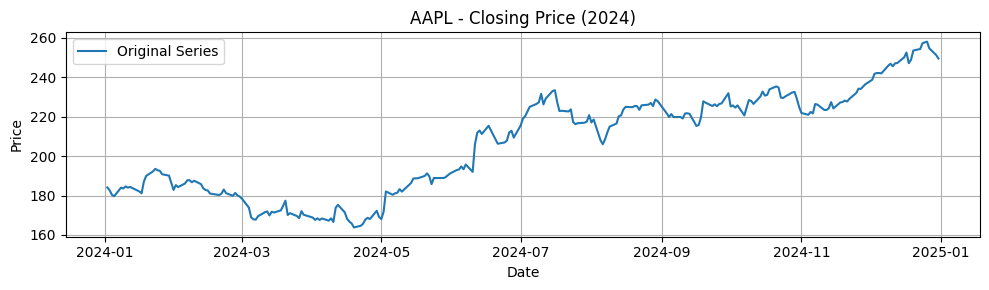

ADF p-value: 0.9292
Time series is non-stationary. Applying differencing (d=1)
Fitting ARIMA(5,1,0) model for AAPL...
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  252
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -617.296
Date:                Sun, 28 Sep 2025   AIC                           1246.592
Time:                        17:28:15   BIC                           1267.744
Sample:                             0   HQIC                          1255.104
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0823      0.060      1.374      0.169      -0.035       0.200
ar.L2        

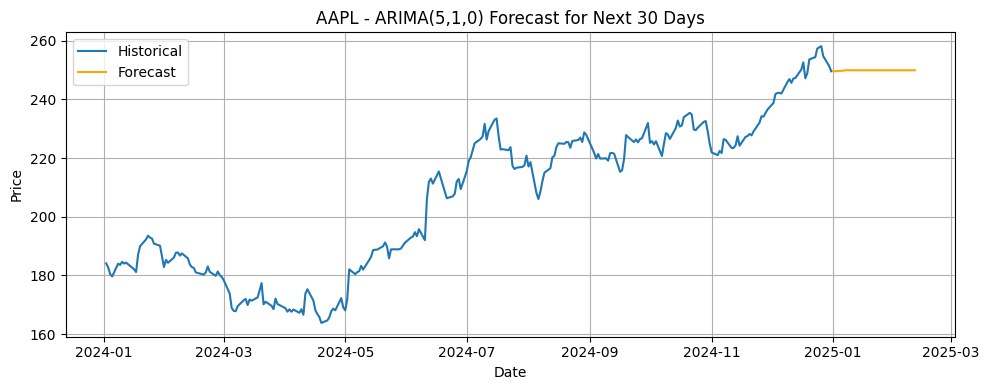


=== GOOG ===


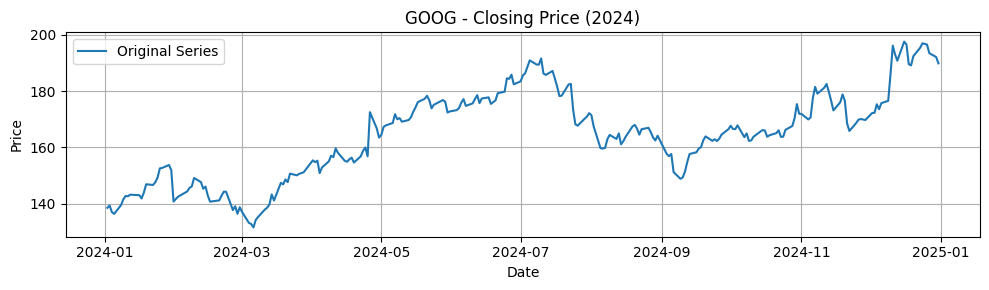

ADF p-value: 0.5378
Time series is non-stationary. Applying differencing (d=1)
Fitting ARIMA(5,1,0) model for GOOG...
                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                  252
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -620.155
Date:                Sun, 28 Sep 2025   AIC                           1252.311
Time:                        17:28:16   BIC                           1273.464
Sample:                             0   HQIC                          1260.823
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0577      0.048      1.214      0.225      -0.036       0.151
ar.L2        

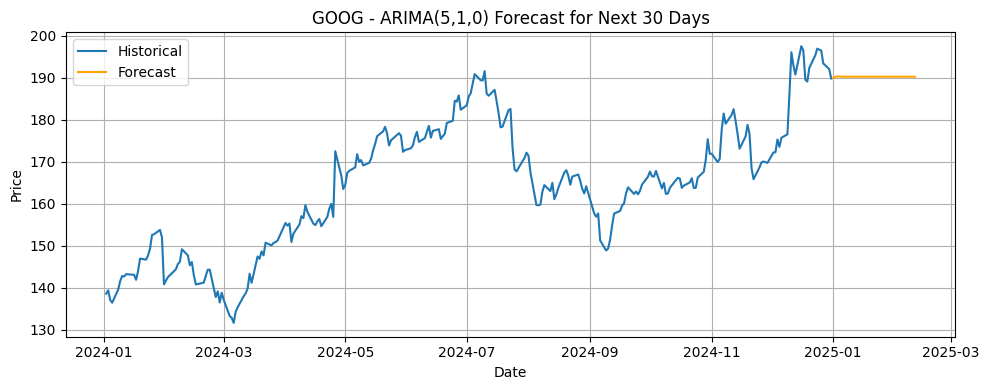


=== TSLA ===


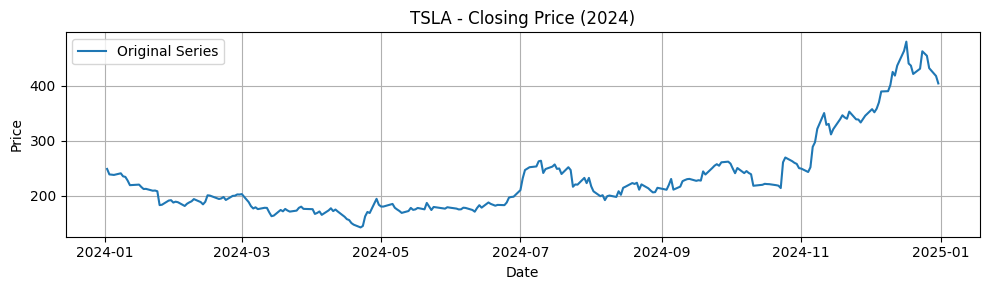

ADF p-value: 0.9738
Time series is non-stationary. Applying differencing (d=1)
Fitting ARIMA(5,1,0) model for TSLA...
                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                  252
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -932.119
Date:                Sun, 28 Sep 2025   AIC                           1876.238
Time:                        17:28:16   BIC                           1897.391
Sample:                             0   HQIC                          1884.751
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0654      0.063      1.035      0.301      -0.058       0.189
ar.L2        

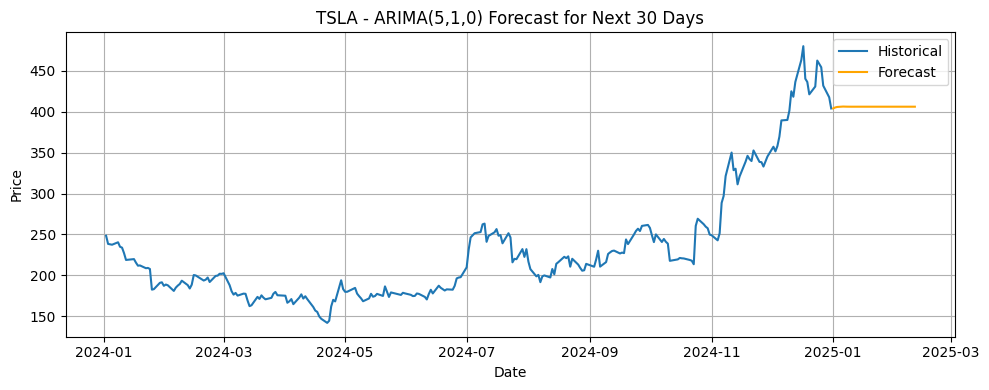


=== AMZN ===


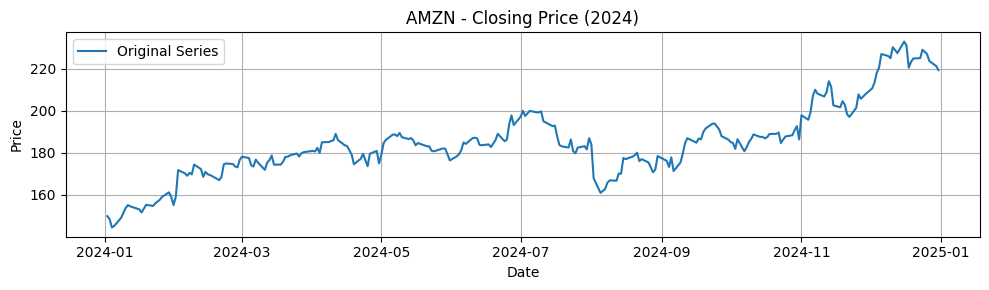

ADF p-value: 0.4312
Time series is non-stationary. Applying differencing (d=1)
Fitting ARIMA(5,1,0) model for AMZN...
                               SARIMAX Results                                
Dep. Variable:                   AMZN   No. Observations:                  252
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -648.317
Date:                Sun, 28 Sep 2025   AIC                           1308.634
Time:                        17:28:17   BIC                           1329.786
Sample:                             0   HQIC                          1317.146
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0549      0.055      1.008      0.314      -0.052       0.162
ar.L2        

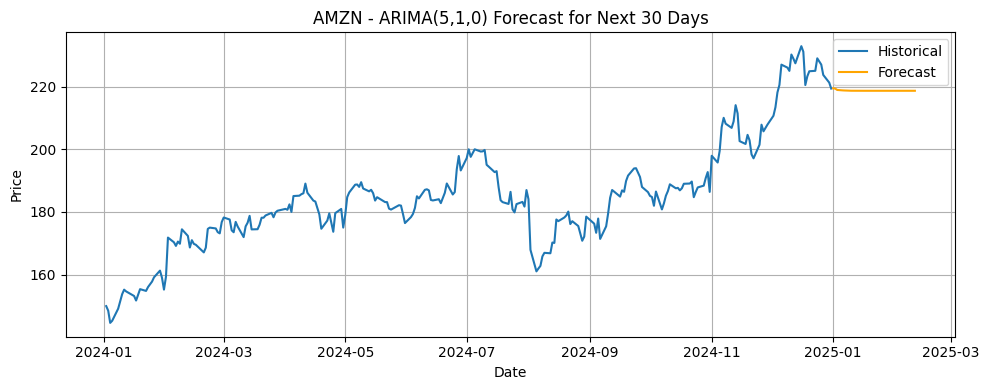


=== MSFT ===


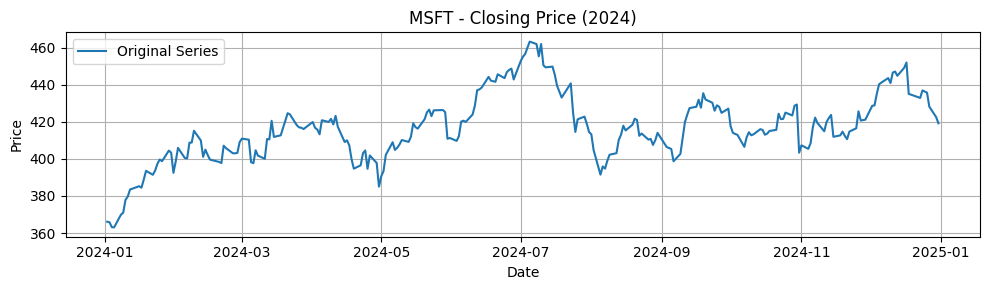

ADF p-value: 0.0202
Time series is stationary. Using d=0
Fitting ARIMA(5,0,0) model for MSFT...
                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                  252
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -772.395
Date:                Sun, 28 Sep 2025   AIC                           1558.790
Time:                        17:28:18   BIC                           1583.496
Sample:                             0   HQIC                          1568.731
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        412.4691      7.642     53.972      0.000     397.490     427.448
ar.L1          0.9888      0.069   

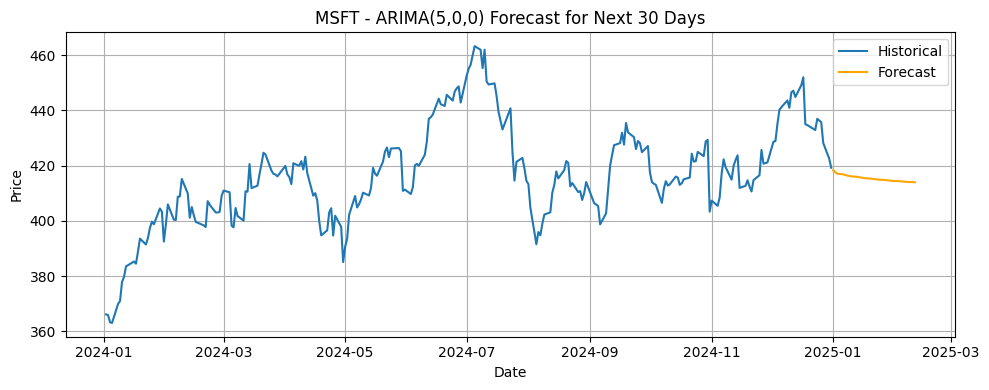

In [ ]:
#ADF and ARIMA Analysis
# Install required packages (if not already installed)
!pip install yfinance statsmodels matplotlib pandas --quiet

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# --- Parameters ---
tickers = ['AAPL', 'GOOG', 'TSLA', 'AMZN', 'MSFT']
start_date = '2024-01-01'
end_date = '2025-01-01'
forecast_steps = 30  # days to forecast
p, q = 5, 0  # ARIMA(p,d,q) where d is determined by ADF

# --- Download Data ---
data = yf.download(tickers, start=start_date, end=end_date)['Close']
data.ffill(inplace=True)

# --- ADF Test Function ---
def adf_test(series):
    result = adfuller(series.dropna())
    p_value = result[1]
    is_stationary = p_value < 0.05
    return is_stationary, p_value

# --- Loop Through Each Stock ---
for ticker in tickers:
    print(f"\n=== {ticker} ===")
    ts = data[ticker].dropna()

    # Plot original series
    plt.figure(figsize=(10, 3))
    plt.plot(ts, label='Original Series')
    plt.title(f"{ticker} - Closing Price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Perform ADF Test
    stationary, p_value = adf_test(ts)
    print(f"ADF p-value: {p_value:.4f}")
    if stationary:
        print("Time series is stationary. Using d=0")
        d = 0
        ts_to_use = ts
    else:
        print("Time series is non-stationary. Applying differencing (d=1)")
        d = 1
        ts_to_use = ts.diff().dropna()

    # --- Fit ARIMA Model ---
    try:
        print(f"Fitting ARIMA({p},{d},{q}) model for {ticker}...")
        model = ARIMA(ts, order=(p, d, q))
        model_fit = model.fit()
        print(model_fit.summary())

        # --- Forecast ---
        forecast = model_fit.forecast(steps=forecast_steps)

        # Plot forecast
        plt.figure(figsize=(10, 4))
        plt.plot(ts, label='Historical')
        plt.plot(pd.date_range(ts.index[-1], periods=forecast_steps+1, freq='B')[1:], forecast, label='Forecast', color='orange')
        plt.title(f"{ticker} - ARIMA({p},{d},{q}) Forecast for Next {forecast_steps} Days")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error fitting ARIMA for {ticker}: {e}")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Processing AAPL...


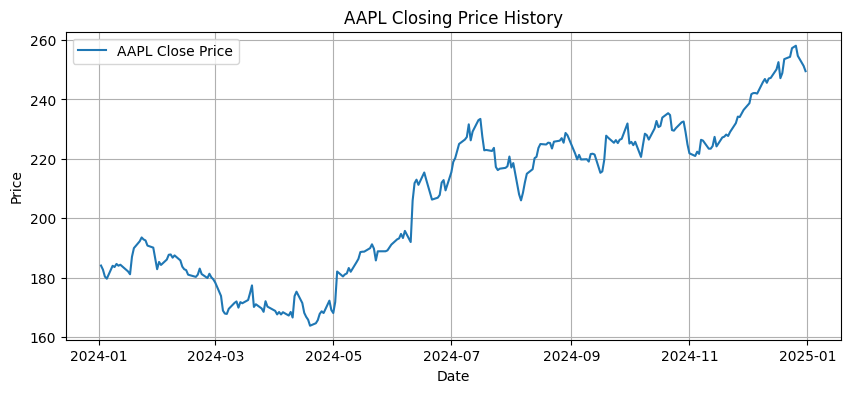

ADF Statistic: -0.2735
P-Value: 0.9292
Series is non-stationary. Setting differencing order d=1.
Fitting SARIMA model with order=(1, 1, 1) and seasonal_order=(1, 0, 1, 5)...
                                     SARIMAX Results                                     
Dep. Variable:                              AAPL   No. Observations:                  252
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 5)   Log Likelihood                -603.618
Date:                           Sun, 28 Sep 2025   AIC                           1217.236
Time:                                   17:32:25   BIC                           1234.722
Sample:                                        0   HQIC                          1224.279
                                           - 252                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

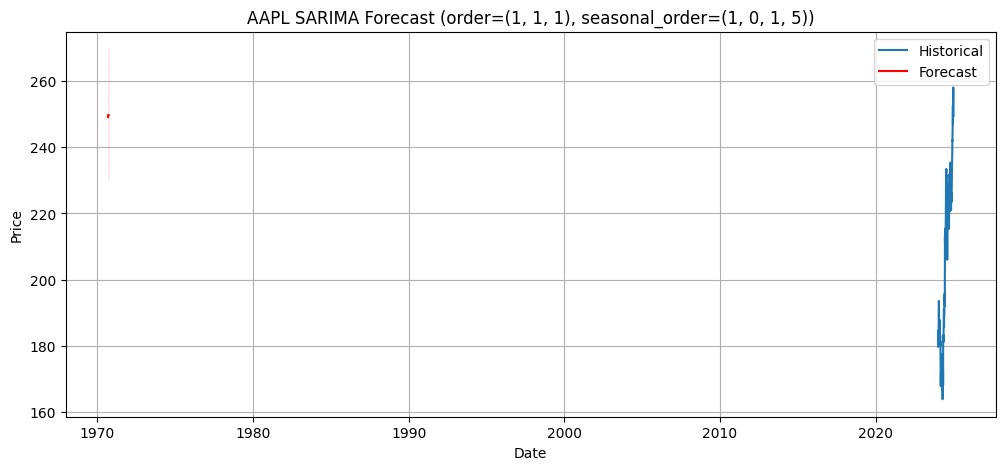


Processing TSLA...


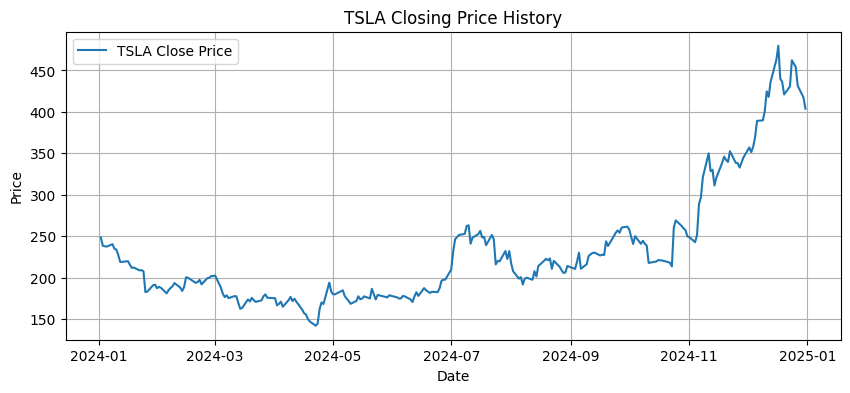

ADF Statistic: 0.2276
P-Value: 0.9738
Series is non-stationary. Setting differencing order d=1.
Fitting SARIMA model with order=(1, 1, 1) and seasonal_order=(1, 0, 1, 5)...
                                     SARIMAX Results                                     
Dep. Variable:                              TSLA   No. Observations:                  252
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 5)   Log Likelihood                -908.315
Date:                           Sun, 28 Sep 2025   AIC                           1826.631
Time:                                   17:32:26   BIC                           1844.116
Sample:                                        0   HQIC                          1833.673
                                           - 252                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

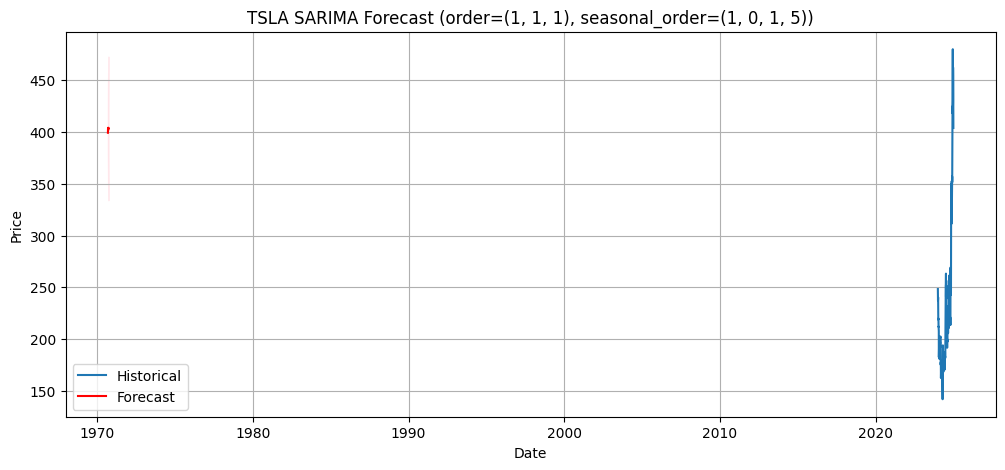


Processing GOOG...


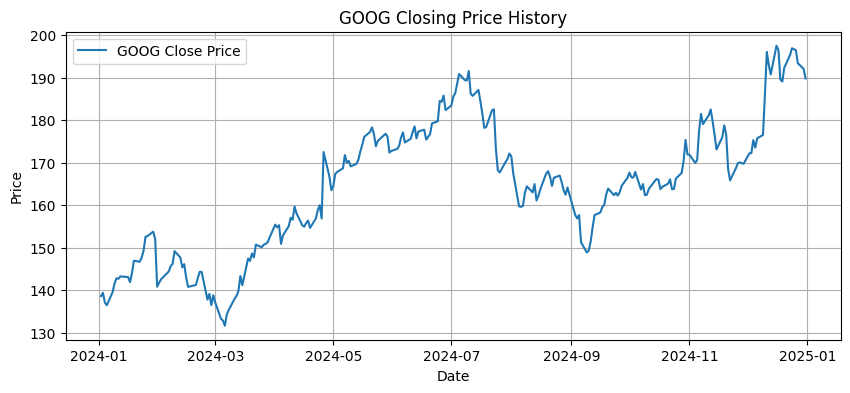

ADF Statistic: -1.4912
P-Value: 0.5378
Series is non-stationary. Setting differencing order d=1.
Fitting SARIMA model with order=(1, 1, 1) and seasonal_order=(1, 0, 1, 5)...
                                     SARIMAX Results                                     
Dep. Variable:                              GOOG   No. Observations:                  252
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 5)   Log Likelihood                -606.346
Date:                           Sun, 28 Sep 2025   AIC                           1222.693
Time:                                   17:32:27   BIC                           1240.178
Sample:                                        0   HQIC                          1229.735
                                           - 252                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

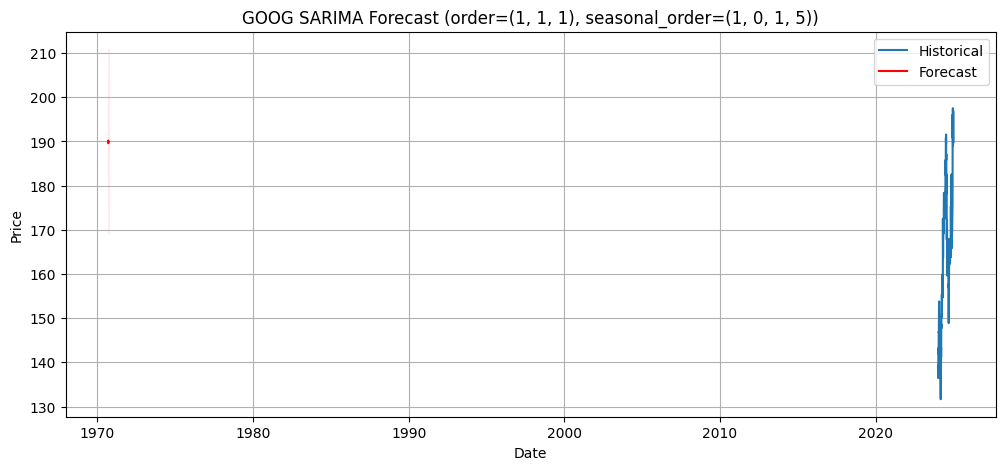


Processing MSFT...


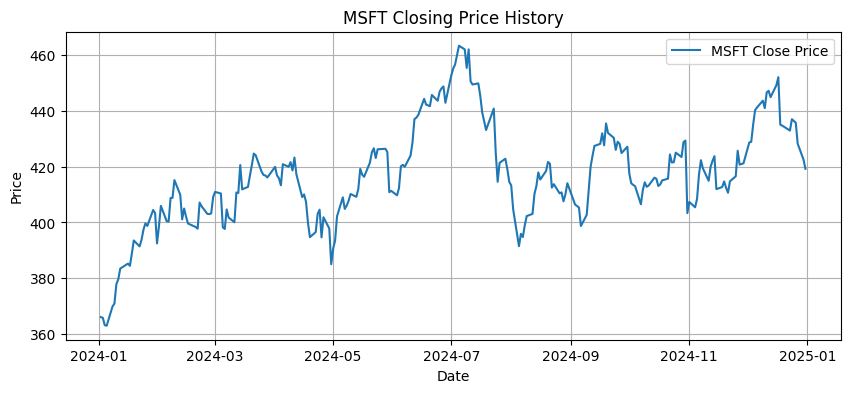

ADF Statistic: -3.1965
P-Value: 0.0202
Series is stationary. Setting differencing order d=0.
Fitting SARIMA model with order=(1, 0, 1) and seasonal_order=(1, 0, 1, 5)...
                                     SARIMAX Results                                     
Dep. Variable:                              MSFT   No. Observations:                  252
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 5)   Log Likelihood                -754.726
Date:                           Sun, 28 Sep 2025   AIC                           1519.451
Time:                                   17:32:28   BIC                           1536.958
Sample:                                        0   HQIC                          1526.501
                                           - 252                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

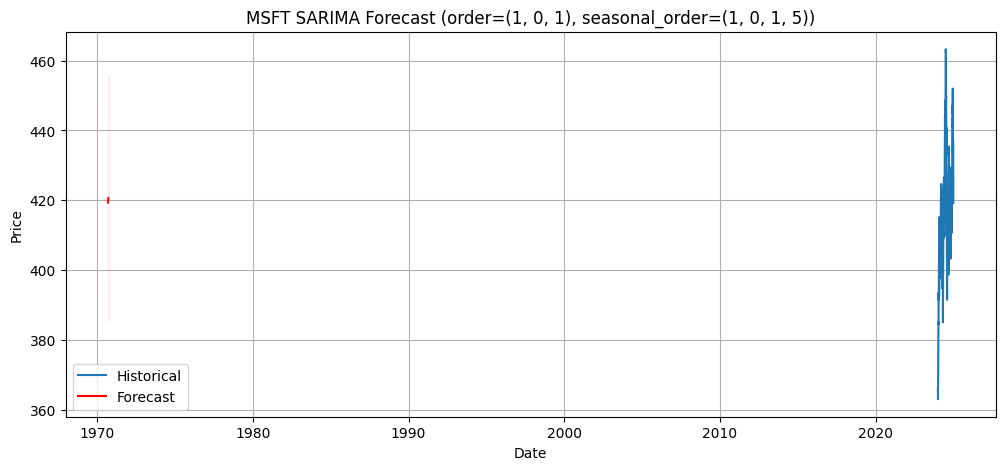


Processing AMZN...


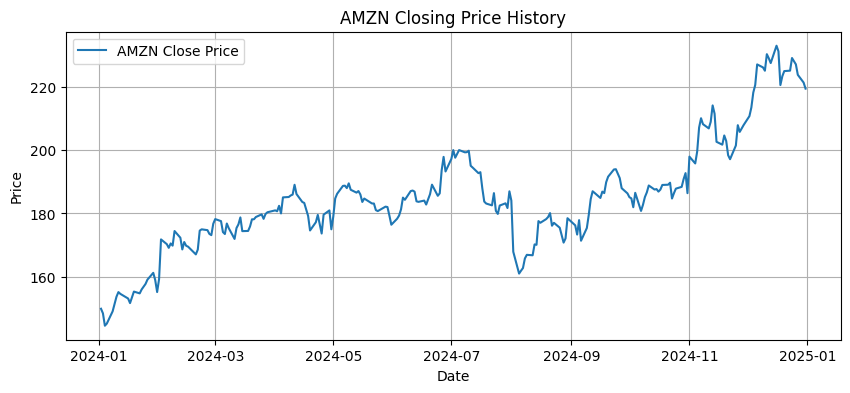

ADF Statistic: -1.6998
P-Value: 0.4312
Series is non-stationary. Setting differencing order d=1.
Fitting SARIMA model with order=(1, 1, 1) and seasonal_order=(1, 0, 1, 5)...
                                     SARIMAX Results                                     
Dep. Variable:                              AMZN   No. Observations:                  252
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 5)   Log Likelihood                -634.641
Date:                           Sun, 28 Sep 2025   AIC                           1279.282
Time:                                   17:32:29   BIC                           1296.768
Sample:                                        0   HQIC                          1286.324
                                           - 252                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

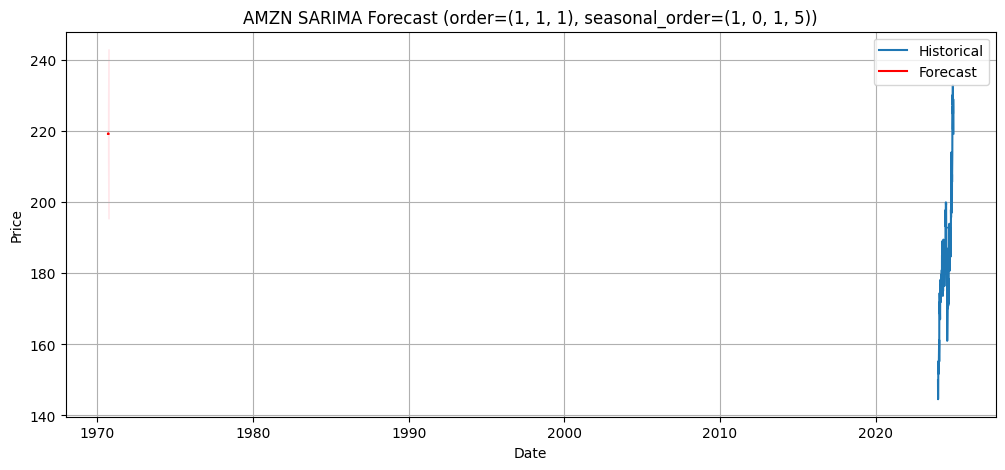

In [ ]:
#ADF Test and SARIMA Analysis
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# 1. Define tickers and dates
tickers = ['AAPL', 'TSLA', 'GOOG', 'MSFT', 'AMZN']
start_date = '2024-01-01'
end_date = '2025-01-01'
forecast_steps = 12

# 2. Download and combine closing price data
combined_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)[['Close']]
    data.rename(columns={'Close': ticker}, inplace=True)
    if combined_df.empty:
        combined_df = data
    else:
        combined_df = combined_df.join(data, how='outer')

# Forward fill missing data
combined_df.ffill(inplace=True)

# 3. ADFTest and SARIMA modeling + forecasting for each stock
for ticker in tickers:
    print(f"\nProcessing {ticker}...")

    ts = combined_df[ticker].dropna()

    # Plot historical data
    plt.figure(figsize=(10, 4))
    plt.plot(ts, label=f"{ticker} Close Price")
    plt.title(f"{ticker} Closing Price History")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

    # Check stationarity with ADF test
    adf_result = adfuller(ts)
    print(f"ADF Statistic: {adf_result[0]:.4f}")
    print(f"P-Value: {adf_result[1]:.4f}")

    d = 0
    if adf_result[1] > 0.05:
        print("Series is non-stationary. Setting differencing order d=1.")
        d = 1
    else:
        print("Series is stationary. Setting differencing order d=0.")

    # Define SARIMA order parameters
    p, q = 1, 1  # non-seasonal AR and MA terms
    P, Q = 1, 1  # seasonal AR and MA terms
    D = 0        # seasonal differencing order
    s = 5        # seasonal period - 5 for weekly seasonality on daily data (approx trading days/week)

    # Seasonal differencing order D - can set to 1 if you suspect seasonality
    seasonal_order = (P, D, Q, s)
    order = (p, d, q)

    # Fit SARIMA model
    print(f"Fitting SARIMA model with order={order} and seasonal_order={seasonal_order}...")
    model = SARIMAX(ts, order=order, seasonal_order=seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()

    print(model_fit.summary())

    # Forecast
    print(f"Forecasting next {forecast_steps} days...")
    forecast_result = model_fit.get_forecast(steps=forecast_steps)
    forecast = forecast_result.predicted_mean
    conf_int = forecast_result.conf_int()

    # Plot historical data + forecast + confidence intervals
    plt.figure(figsize=(12, 5))
    plt.plot(ts, label='Historical')
    plt.plot(forecast.index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast.index,
                     conf_int.iloc[:, 0],
                     conf_int.iloc[:, 1],
                     color='pink', alpha=0.3)
    plt.title(f'{ticker} SARIMA Forecast (order={order}, seasonal_order={seasonal_order})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


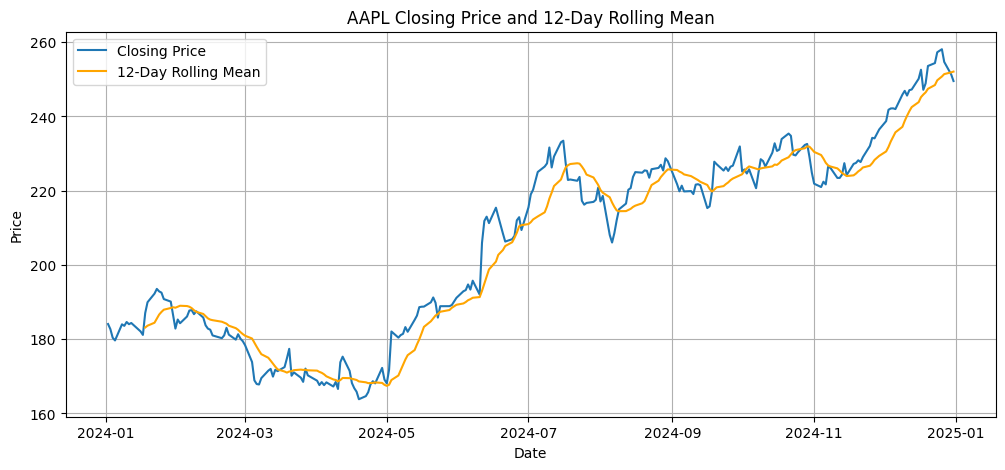

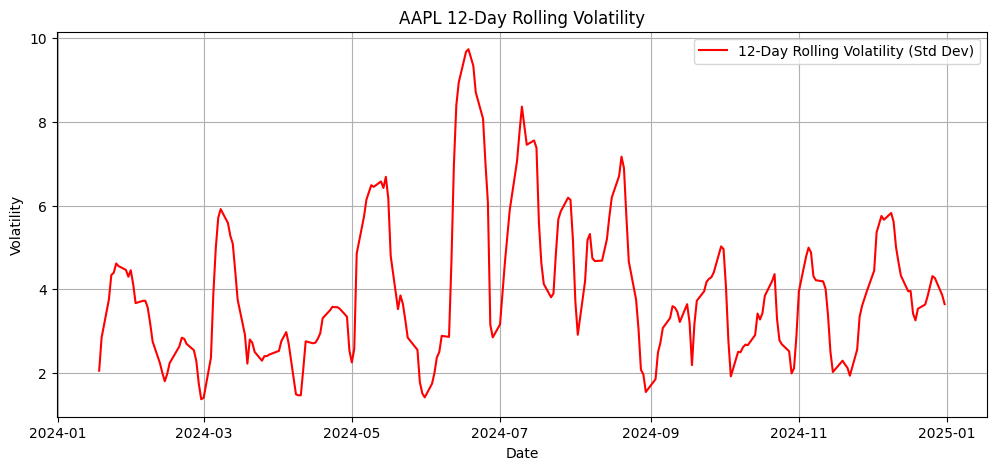

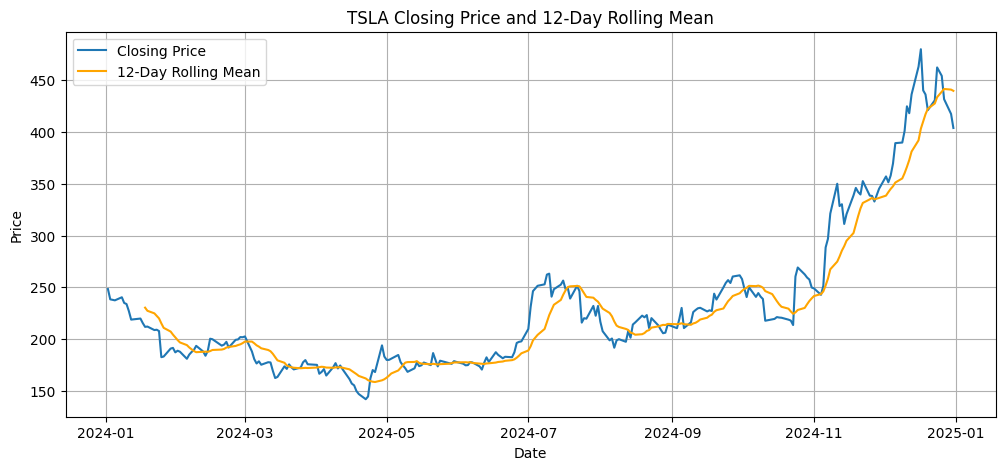

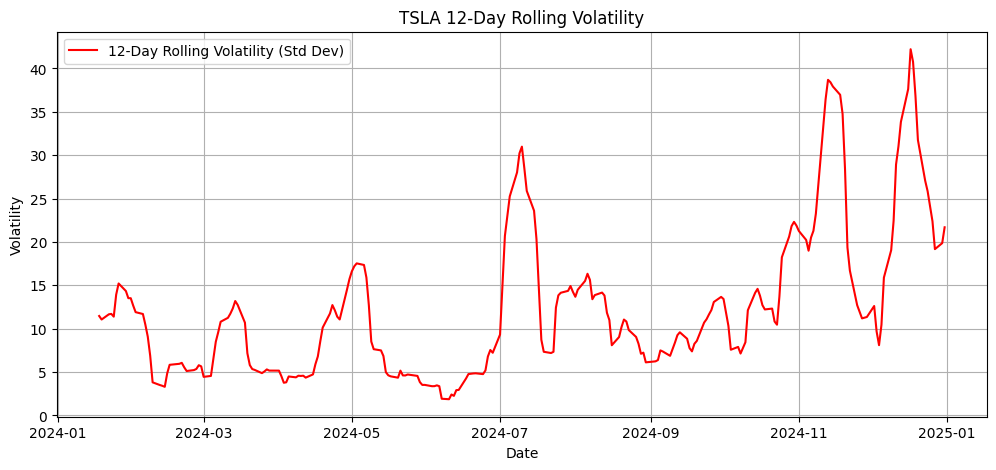

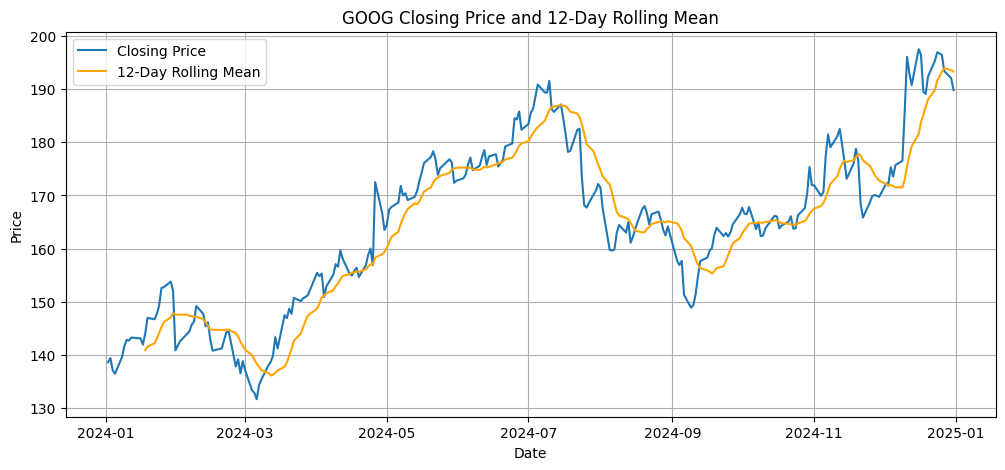

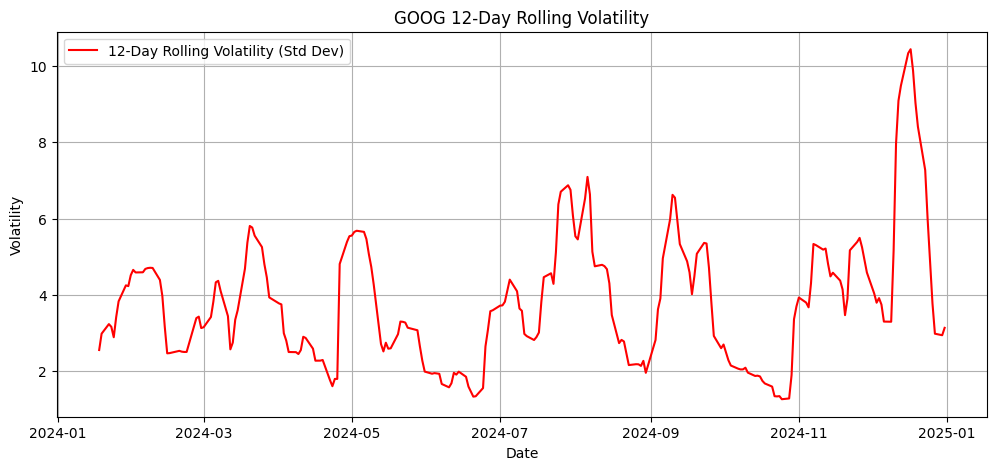

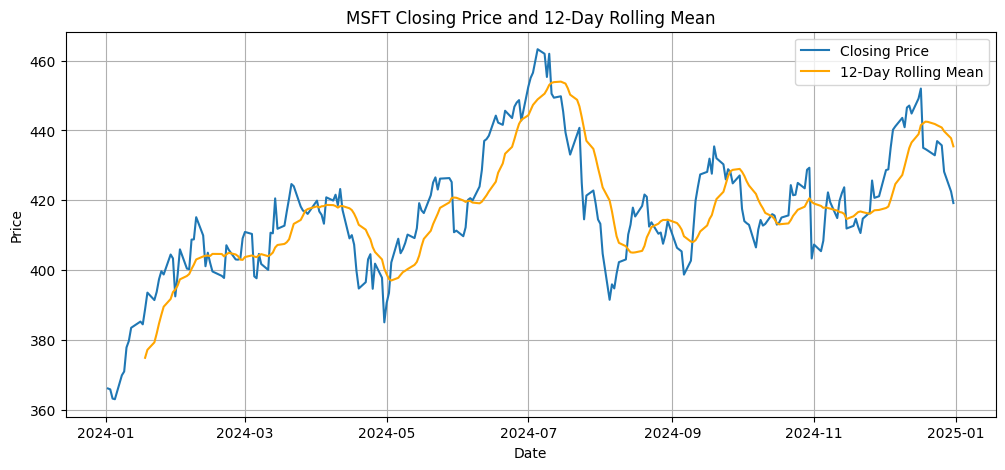

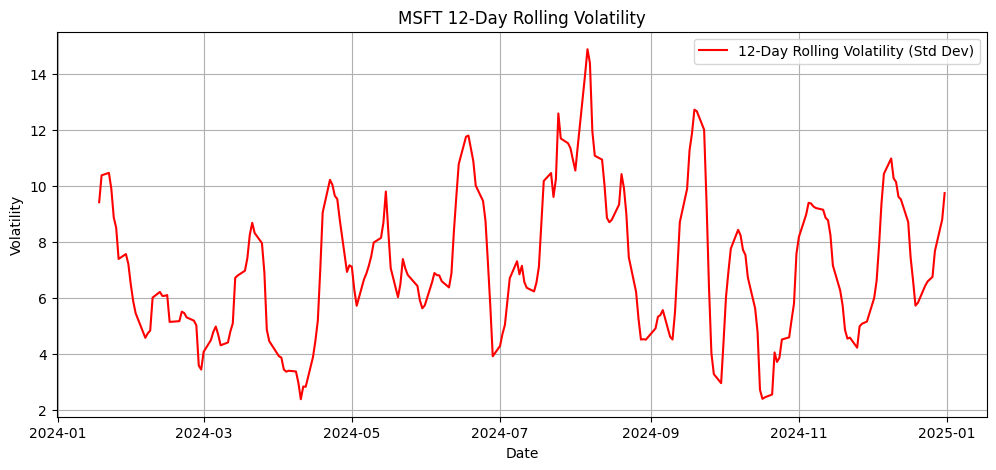

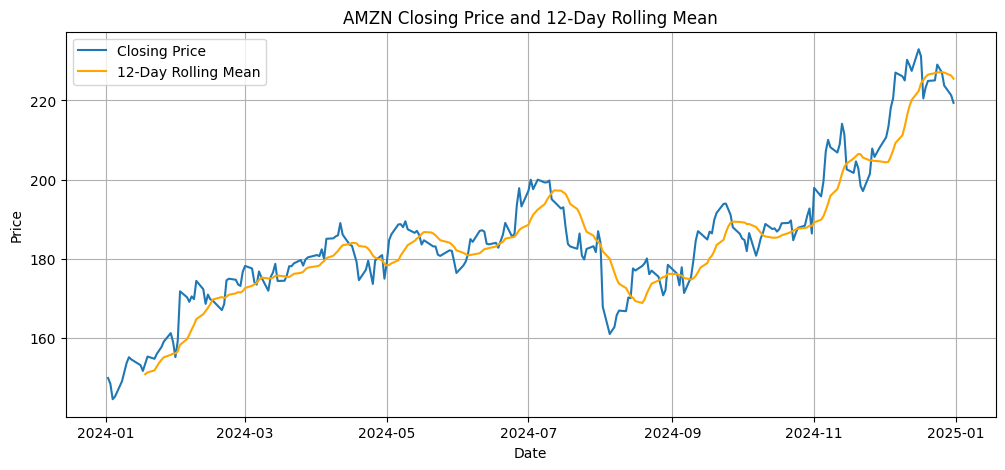

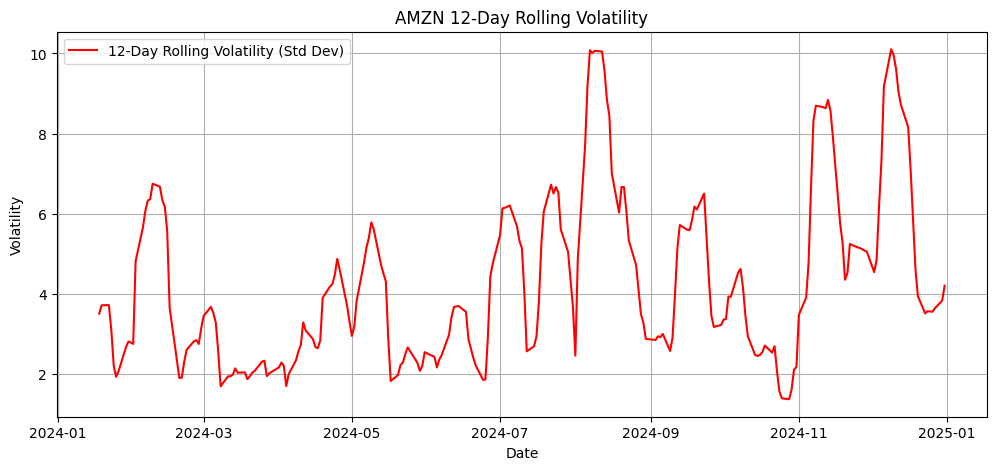

In [ ]:
#Rolling mean and Rolling volatility
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers and dates
tickers = ['AAPL', 'TSLA', 'GOOG', 'MSFT', 'AMZN']
start_date = '2024-01-01'
end_date = '2025-01-01'

# Download closing price data
combined_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)[['Close']]
    data.rename(columns={'Close': ticker}, inplace=True)
    if combined_df.empty:
        combined_df = data
    else:
        combined_df = combined_df.join(data, how='outer')

# Forward fill missing data
combined_df.ffill(inplace=True)

# Define rolling window size
window = 12

# Perform rolling mean and rolling volatility analysis
for ticker in tickers:
    ts = combined_df[ticker].dropna()

    rolling_mean = ts.rolling(window=window).mean()
    rolling_volatility = ts.rolling(window=window).std()

    # Plot Closing Price and Rolling Mean
    plt.figure(figsize=(12,5))
    plt.plot(ts, label='Closing Price')
    plt.plot(rolling_mean, label=f'{window}-Day Rolling Mean', color='orange')
    plt.title(f'{ticker} Closing Price and {window}-Day Rolling Mean')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Rolling Volatility
    plt.figure(figsize=(12,5))
    plt.plot(rolling_volatility, label=f'{window}-Day Rolling Volatility (Std Dev)', color='red')
    plt.title(f'{ticker} {window}-Day Rolling Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid()
    plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


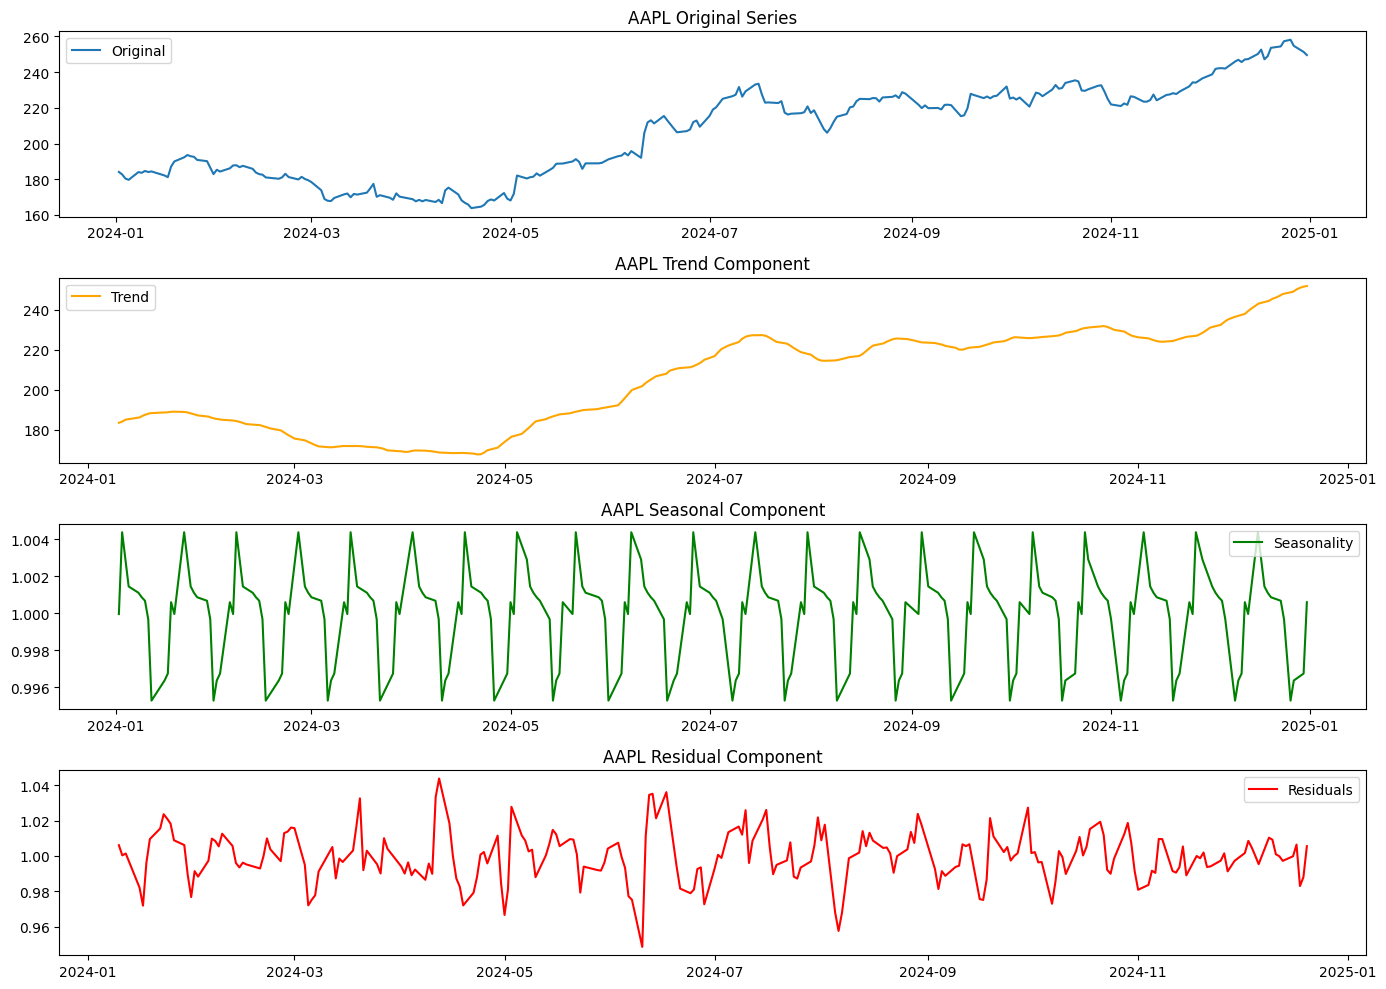

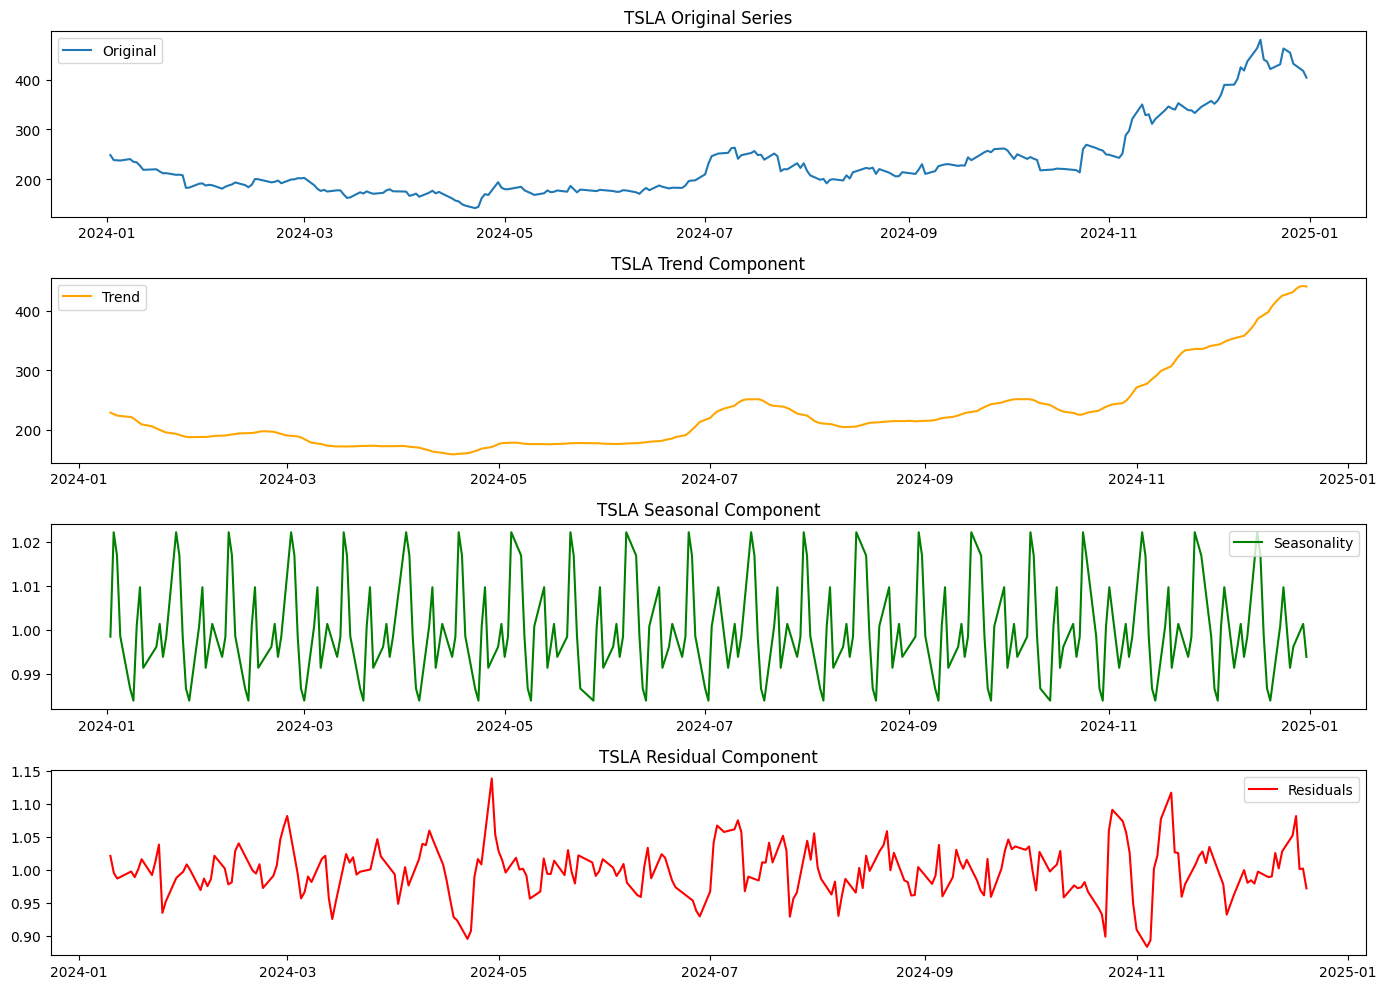

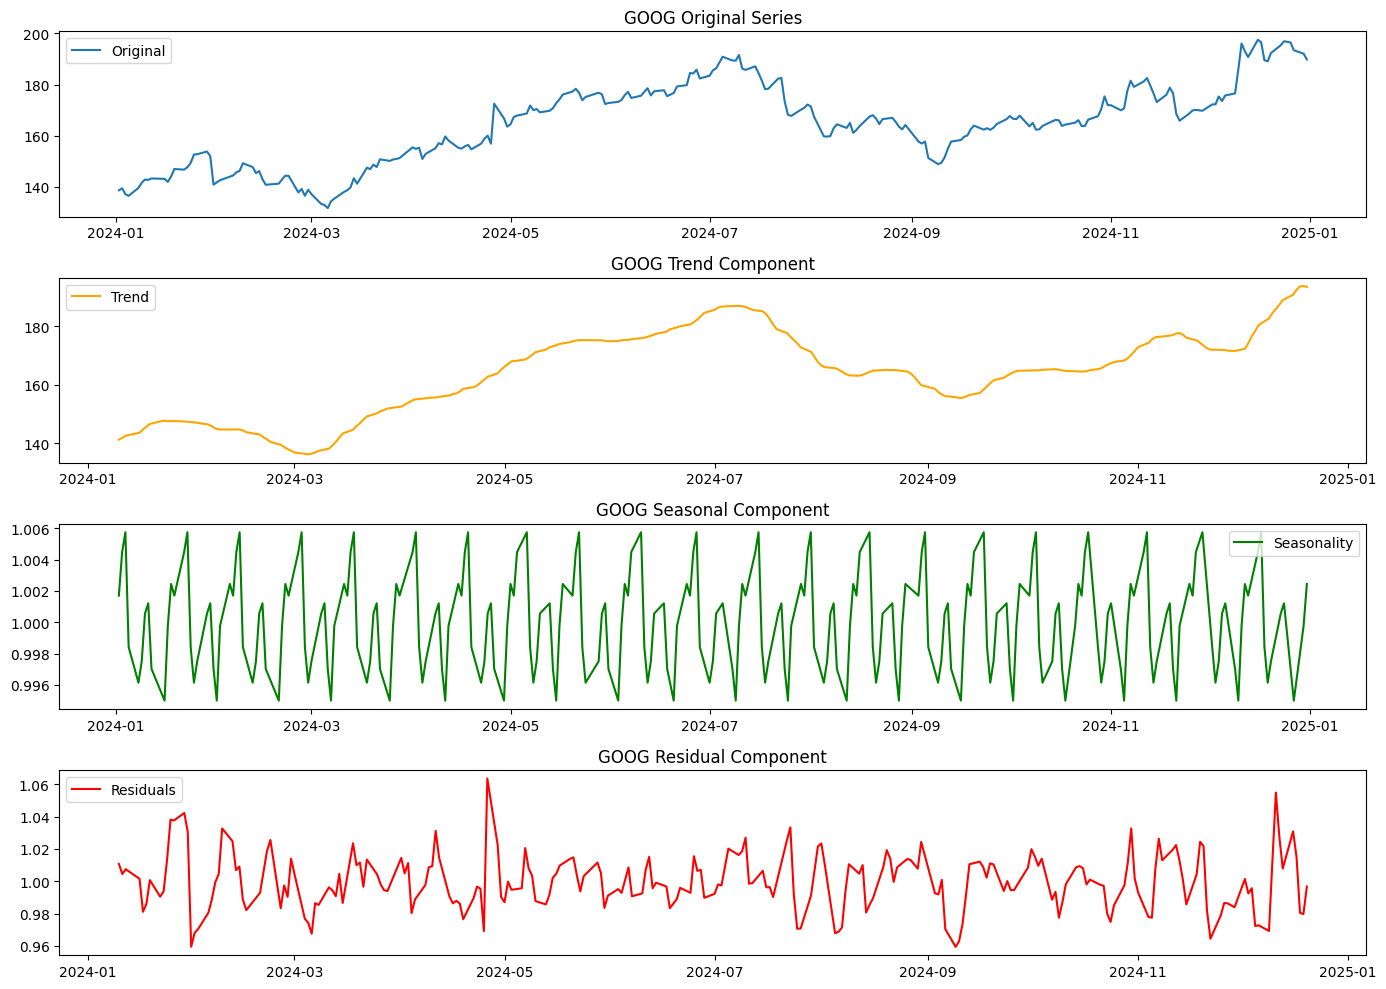

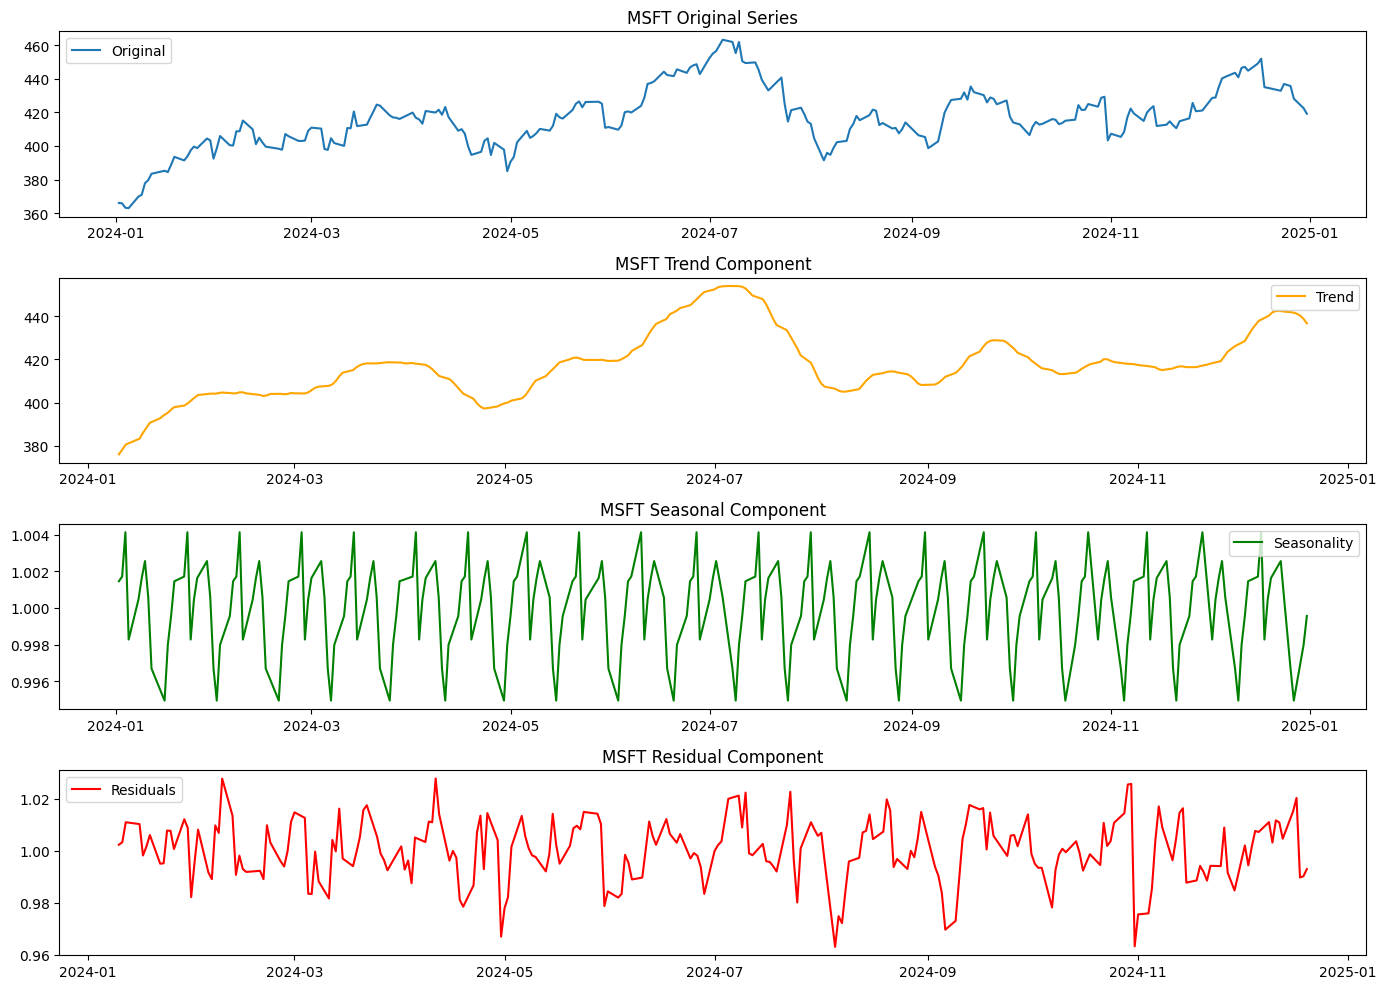

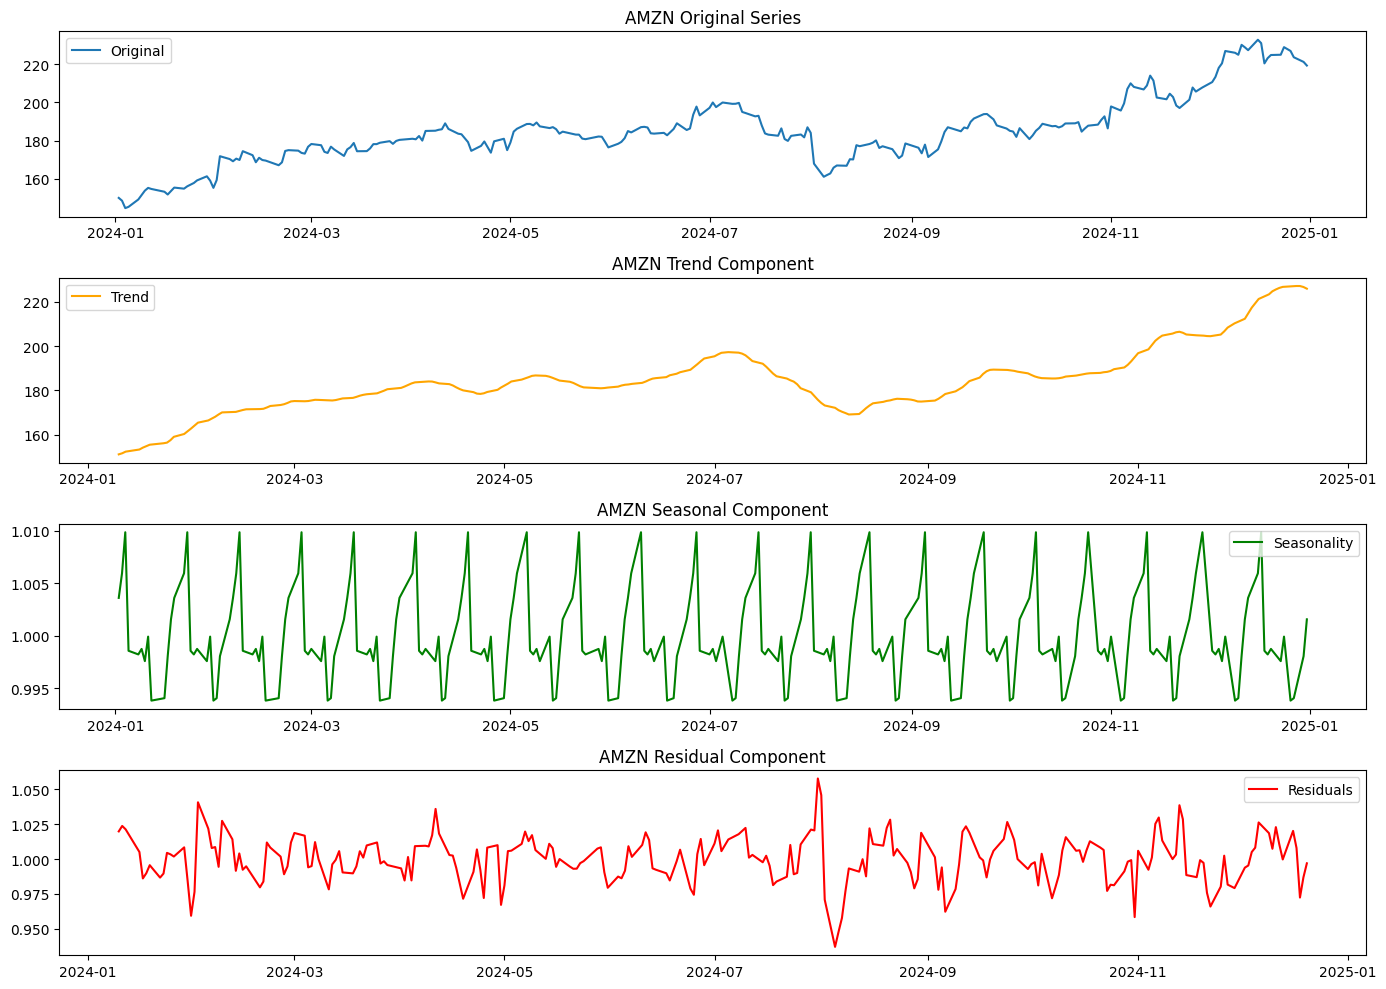

In [ ]:
#STL
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Define tickers and dates
tickers = ['AAPL', 'TSLA', 'GOOG', 'MSFT', 'AMZN']
start_date = '2024-01-01'
end_date = '2025-01-01'

# Download closing price data
combined_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)[['Close']]
    data.rename(columns={'Close': ticker}, inplace=True)
    if combined_df.empty:
        combined_df = data
    else:
        combined_df = combined_df.join(data, how='outer')

# Forward fill missing data
combined_df.ffill(inplace=True)

# Perform seasonal decomposition for each stock
for ticker in tickers:
    ts = combined_df[ticker].dropna()

    # Seasonal decomposition=
    decomposition = seasonal_decompose(ts, model='multiplicative', period=12)

    # Plot the decomposition components
    plt.figure(figsize=(14, 10))

    plt.subplot(411)
    plt.plot(ts, label='Original')
    plt.title(f'{ticker} Original Series')
    plt.legend()

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title(f'{ticker} Trend Component')
    plt.legend()

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonality', color='green')
    plt.title(f'{ticker} Seasonal Component')
    plt.legend()

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title(f'{ticker} Residual Component')
    plt.legend()

    plt.tight_layout()
    plt.show()


[*********************100%***********************]  2 of 2 completed


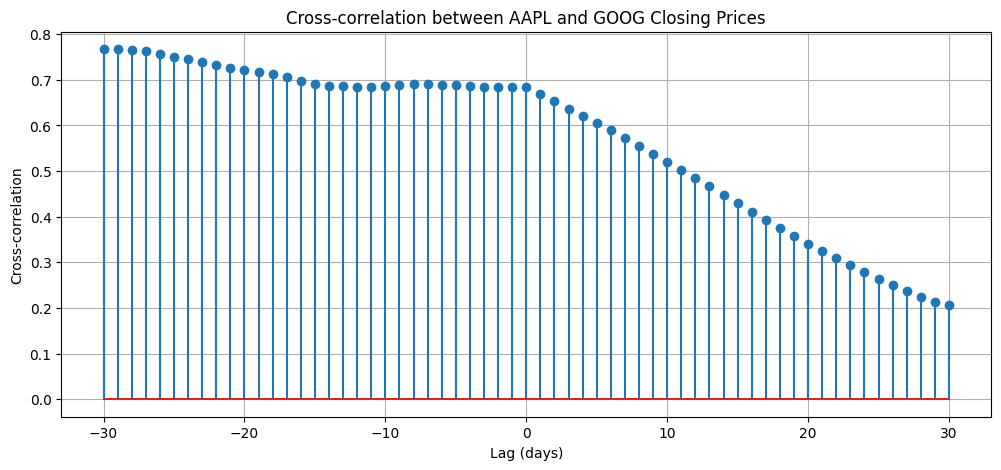

In [ ]:
#Cross correlation
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download Apple and Google stock data
tickers = ['AAPL', 'GOOG']
data = yf.download(tickers, start='2024-01-01', end='2025-01-01')['Close']

# Forward fill missing values if any
data.ffill(inplace=True)

# Extract the two series
aapl = data['AAPL'].dropna()
goog = data['GOOG'].dropna()

# Normalize the series
aapl_norm = (aapl - aapl.mean()) / aapl.std()
goog_norm = (goog - goog.mean()) / goog.std()

# Compute cross-correlation at lags from -max_lag to +max_lag
max_lag = 30
cross_corr = []

for lag in range(-max_lag, max_lag + 1):
    if lag < 0:
        # Shift goog forward, so goog leads aapl by |lag|
        shifted_goog = goog_norm.shift(-lag)
        corr = aapl_norm.loc[shifted_goog.index].corr(shifted_goog)
    else:
        # Shift goog backward, so aapl leads goog by lag
        shifted_goog = goog_norm.shift(-lag)
        corr = aapl_norm.loc[shifted_goog.index].corr(shifted_goog)
    cross_corr.append(corr)

lags = range(-max_lag, max_lag + 1)

# Plot the cross-correlation function
plt.figure(figsize=(12, 5))
plt.stem(lags, cross_corr)  # removed use_line_collection argument
plt.xlabel('Lag (days)')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between AAPL and GOOG Closing Prices')
plt.grid(True)
plt.show()



[*********************100%***********************]  5 of 5 completed


Returns data shape: (1257, 5)
Ticker          AAPL      AMZN      GOOG      MSFT      TSLA
Date                                                        
2020-01-03 -0.009770 -0.012213 -0.004920 -0.012530  0.029203
2020-01-06  0.007937  0.014776  0.024358  0.002582  0.019072
2020-01-07 -0.004714  0.002089 -0.000624 -0.009160  0.038067
2020-01-08  0.015959 -0.007839  0.007850  0.015803  0.048033
2020-01-09  0.021018  0.004788  0.010984  0.012415 -0.022189
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -40.13     -40.10*   3.749e-18     -40.12*
1      -40.15*      -40.03  3.648e-18*      -40.11
2       -40.13      -39.91   3.718e-18      -40.05
3       -40.13      -39.80   3.747e-18      -40.00
4       -40.11      -39.67   3.813e-18      -39.95
5       -40.09      -39.55   3.899e-18      -39.88
6       -40.08      -39.44   3.942e-18      -39.83
7       -40.07      -39.33   3.94

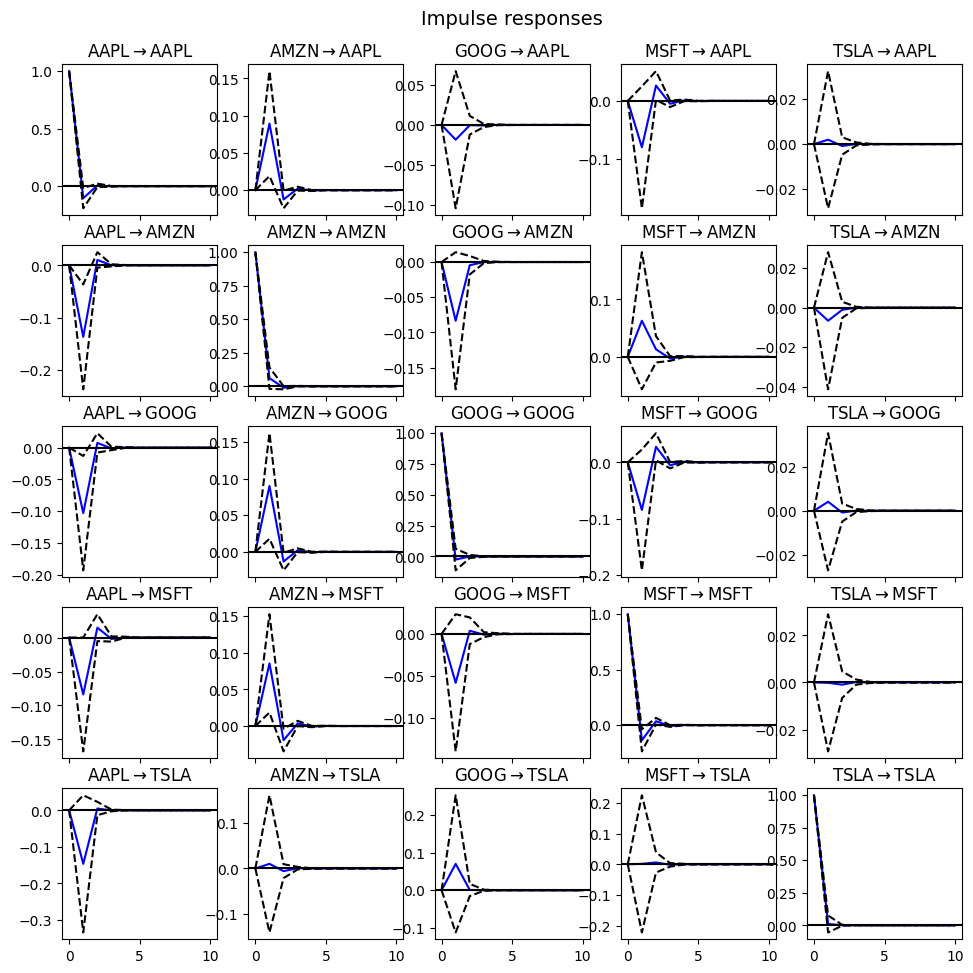

In [ ]:
#VAR
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import warnings

warnings.filterwarnings("ignore")

# Download extended data for better modeling
tickers = ['AAPL', 'GOOG', 'TSLA', 'AMZN', 'MSFT']
start_date = '2020-01-01'
end_date = '2025-01-01'

data = yf.download(tickers, start=start_date, end=end_date)['Close']
data.ffill(inplace=True)

returns = np.log(data).diff().dropna()
print("Returns data shape:", returns.shape)
print(returns.head())

model = VAR(returns)
lag_order_results = model.select_order(maxlags=15)
print(lag_order_results.summary())

optimal_lag = lag_order_results.selected_orders['aic']
if optimal_lag is None:
    print("AIC lag selection failed, using default lag=1")
    optimal_lag = 1

print(f"Using lag order = {optimal_lag}")

var_model = model.fit(optimal_lag)
print(var_model.summary())

forecast_steps = 5
forecast = var_model.forecast(returns.values[-optimal_lag:], steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, columns=returns.columns)
print(f"\nForecasted returns for next {forecast_steps} days:")
print(forecast_df)

irf = var_model.irf(10)
irf.plot(orth=False)
plt.show()
